In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [2]:
from pathlib import Path
print(Path.cwd())

c:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Code Year4


In [3]:
import os

# folder path
dir_path = r'C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Sang_Code_Processing_2024\0. Raw data\Year 4Final\Desigo\Load, PV'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
print(res)

['HZ_Basement_plug_load_060123-053124_raw.csv', 'HZ_Basement_SHNT_cabinet_load_060123-053124_raw.csv', 'HZ_Cooling_pump_load_060123-053124_raw.csv', 'HZ_Electric_hot_water_load_060123-053124_raw.csv', 'HZ_Elevator_load_060123-053124_raw.csv', 'HZ_Elevator_sumpump_load_060123-053124_raw.csv', 'HZ_Emergency_light_load_060123-053124_raw.csv', 'HZ_Exhaust_fan_load_060123-053124_raw.csv', 'HZ_Fire_alarm_panel_load_060123-053124_raw.csv', 'HZ_First_floor_plug_load_060123-053124_raw.csv', 'HZ_Heat_pump_electric_load_060123-053124_raw.csv', 'HZ_Heat_pump_load_060123-053124_raw.csv', 'HZ_IT_load_060123-053124_raw.csv', 'HZ_Lighting_load_060123-053124_raw.csv', 'HZ_Main_load_060123-053124_raw.csv', 'HZ_Plug_third_floor_load_060123-053124_raw.csv', 'HZ_PV_meter1_load_060123-053124_raw.csv', 'HZ_PV_meter2_load_060123-053124_raw.csv', 'HZ_Second_floor_plug_load_060123-053124_raw.csv', 'HZ_Solar_hot_water_load_060123-053124_raw.csv', 'HZ_Solar_rapid_shutdown_load_060123-053124_raw.csv', 'HZ_WindowMa

In [4]:
import os

Lst = []
for i in range(16, len(res)-5):
    # Construct the full path for each file
    file_path = os.path.join(dir_path, res[i])
    # Use the full path to read the CSV file
    data = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col=[0])
    filtered_df = data[data['QualityGood'] == True]
    print(len(filtered_df))
    Lst.append(filtered_df)

527275
527275


In [5]:
Lst

[                                  PV_meter1_load (kW)  Quality  QualityGood
 Timestamp                                                                  
 2023-06-01 00:00:26.510000-04:00                  0.0        0         True
 2023-06-01 00:01:00.510000-04:00                  0.0        0         True
 2023-06-01 00:02:01.950000-04:00                  0.0        0         True
 2023-06-01 00:03:00.510000-04:00                  0.0        0         True
 2023-06-01 00:04:00.510000-04:00                  0.0        0         True
 ...                                               ...      ...          ...
 2024-05-31 23:55:00.360000-04:00                  0.0        0         True
 2024-05-31 23:56:00.330000-04:00                  0.0        0         True
 2024-05-31 23:57:00.340000-04:00                  0.0        0         True
 2024-05-31 23:58:00.360000-04:00                  0.0        0         True
 2024-05-31 23:59:00.350000-04:00                  0.0        0         True

In [6]:
Lst_Slab = []
Lst_name = []
Zone_DF = pd.DataFrame()
# res = 1

for i in range(0,len(Lst)):
    
    Lst[i].index = pd.to_datetime(Lst[i].index, errors='coerce', utc=True, format='mixed')
    Lst[i].index = Lst[i].index.tz_convert('US/Eastern')
    
    Lst[i] = Lst[i].replace([np.inf, -np.inf], np.nan).dropna()
    #Use this for Loads
    # Lst[i] = Lst[i].resample("1T").mean().ffill()
    #Use this for PV
    Lst[i] = Lst[i].resample("H").mean().ffill()
    
    zone_name = Lst[i].columns.values[0]
    Lst_name.append(zone_name)
    Z = pd.to_numeric(Lst[i][zone_name])
    Lst_Slab.append(Z.tolist())
    
    Zone_DF[zone_name] = pd.Series(Z, index=Lst[i].index)
    
Zone_DF

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1522520616.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Lst[i] = Lst[i].resample("H").mean().ffill()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1522520616.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Lst[i] = Lst[i].resample("H").mean().ffill()


,PV_meter1_load (kW),PV_meter2_load (kW)
Timestamp,,
2023-06-01 00:00:00-04:00,0.000000,0.000000
2023-06-01 01:00:00-04:00,0.000000,0.000000
2023-06-01 02:00:00-04:00,0.000000,0.000000
2023-06-01 03:00:00-04:00,0.000000,0.000000
2023-06-01 04:00:00-04:00,0.000000,0.000000
...,...,...
2024-05-31 19:00:00-04:00,0.132383,0.168800
2024-05-31 20:00:00-04:00,0.000000,-0.013998
2024-05-31 21:00:00-04:00,0.000000,0.000000


<Axes: xlabel='Timestamp'>

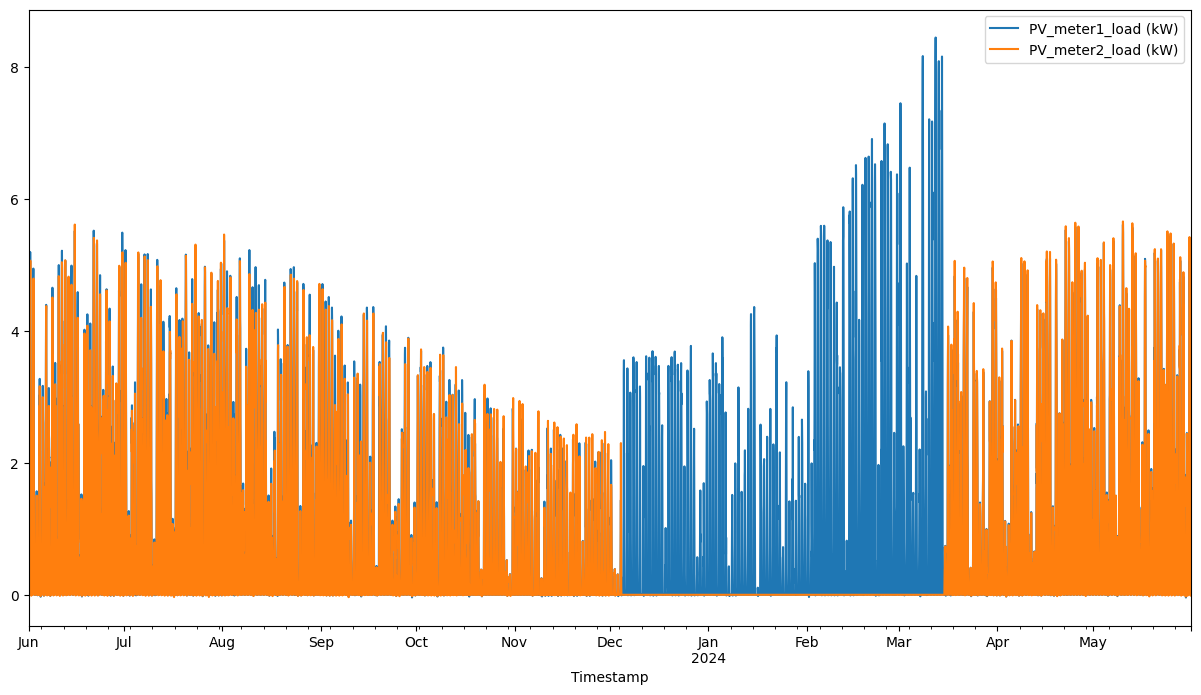

In [7]:
Zone_DF.plot(figsize=(15, 8))

In [8]:
Zone_DF

,PV_meter1_load (kW),PV_meter2_load (kW)
Timestamp,,
2023-06-01 00:00:00-04:00,0.000000,0.000000
2023-06-01 01:00:00-04:00,0.000000,0.000000
2023-06-01 02:00:00-04:00,0.000000,0.000000
2023-06-01 03:00:00-04:00,0.000000,0.000000
2023-06-01 04:00:00-04:00,0.000000,0.000000
...,...,...
2024-05-31 19:00:00-04:00,0.132383,0.168800
2024-05-31 20:00:00-04:00,0.000000,-0.013998
2024-05-31 21:00:00-04:00,0.000000,0.000000


In [9]:
Zone_DF.to_csv(r'C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\PV_Year4.csv', index=True)

In [10]:
#All Loads

In [11]:
res

['HZ_Basement_plug_load_060123-053124_raw.csv',
 'HZ_Basement_SHNT_cabinet_load_060123-053124_raw.csv',
 'HZ_Cooling_pump_load_060123-053124_raw.csv',
 'HZ_Electric_hot_water_load_060123-053124_raw.csv',
 'HZ_Elevator_load_060123-053124_raw.csv',
 'HZ_Elevator_sumpump_load_060123-053124_raw.csv',
 'HZ_Emergency_light_load_060123-053124_raw.csv',
 'HZ_Exhaust_fan_load_060123-053124_raw.csv',
 'HZ_Fire_alarm_panel_load_060123-053124_raw.csv',
 'HZ_First_floor_plug_load_060123-053124_raw.csv',
 'HZ_Heat_pump_electric_load_060123-053124_raw.csv',
 'HZ_Heat_pump_load_060123-053124_raw.csv',
 'HZ_IT_load_060123-053124_raw.csv',
 'HZ_Lighting_load_060123-053124_raw.csv',
 'HZ_Main_load_060123-053124_raw.csv',
 'HZ_Plug_third_floor_load_060123-053124_raw.csv',
 'HZ_PV_meter1_load_060123-053124_raw.csv',
 'HZ_PV_meter2_load_060123-053124_raw.csv',
 'HZ_Second_floor_plug_load_060123-053124_raw.csv',
 'HZ_Solar_hot_water_load_060123-053124_raw.csv',
 'HZ_Solar_rapid_shutdown_load_060123-053124_ra

In [12]:
Load_0 = pd.read_csv(os.path.join(dir_path, res[0]),parse_dates=['Timestamp'], index_col=[0])
Load_0

,Basement_plug_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.200000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.590000-04:00,0.107957,0,True
2023-06-01 00:01:00.570000-04:00,0.107872,0,True
2023-06-01 00:02:02.040000-04:00,0.107440,0,True
2023-06-01 00:03:00.570000-04:00,0.087420,0,True
...,...,...,...
2024-05-31 23:55:00.420000-04:00,0.062790,0,True
2024-05-31 23:56:00.390000-04:00,0.063028,0,True
2024-05-31 23:57:00.420000-04:00,0.063310,0,True


In [13]:
Load_0 = Load_0[Load_0['QualityGood'] == True]

In [14]:
Load_0.describe()

,Basement_plug_load (kW),Quality
count,527033.000000,5.270330e+05
mean,0.103699,1.281779e+10
std,0.102925,1.899403e+12
min,0.037986,0.000000e+00
25%,0.063321,0.000000e+00
50%,0.094844,0.000000e+00
75%,0.113849,0.000000e+00
max,3.292738,2.814750e+14


<Axes: xlabel='Timestamp'>

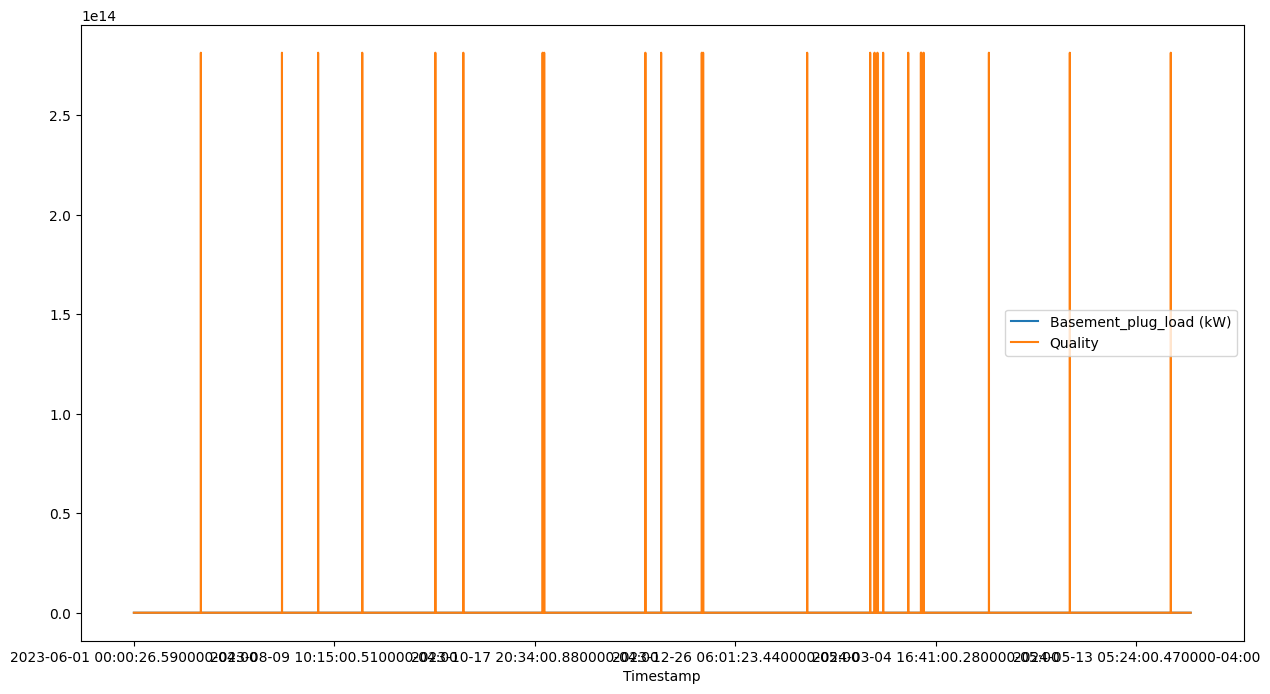

In [15]:
Load_0.plot(figsize=(15, 8))

In [16]:
Load_0['Basement_plug_load (kW)'].describe()

count    527033.000000
mean          0.103699
std           0.102925
min           0.037986
25%           0.063321
50%           0.094844
75%           0.113849
max           3.292738
Name: Basement_plug_load (kW), dtype: float64

In [17]:
Load_0['Basement_plug_load (kW)'] = Load_0['Basement_plug_load (kW)'].where((Load_0['Basement_plug_load (kW)'] < 4) & (Load_0['Basement_plug_load (kW)'] >= 0), np.nan)

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\3903308243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Load_0['Basement_plug_load (kW)'] = Load_0['Basement_plug_load (kW)'].where((Load_0['Basement_plug_load (kW)'] < 4) & (Load_0['Basement_plug_load (kW)'] >= 0), np.nan)


<Axes: xlabel='Timestamp'>

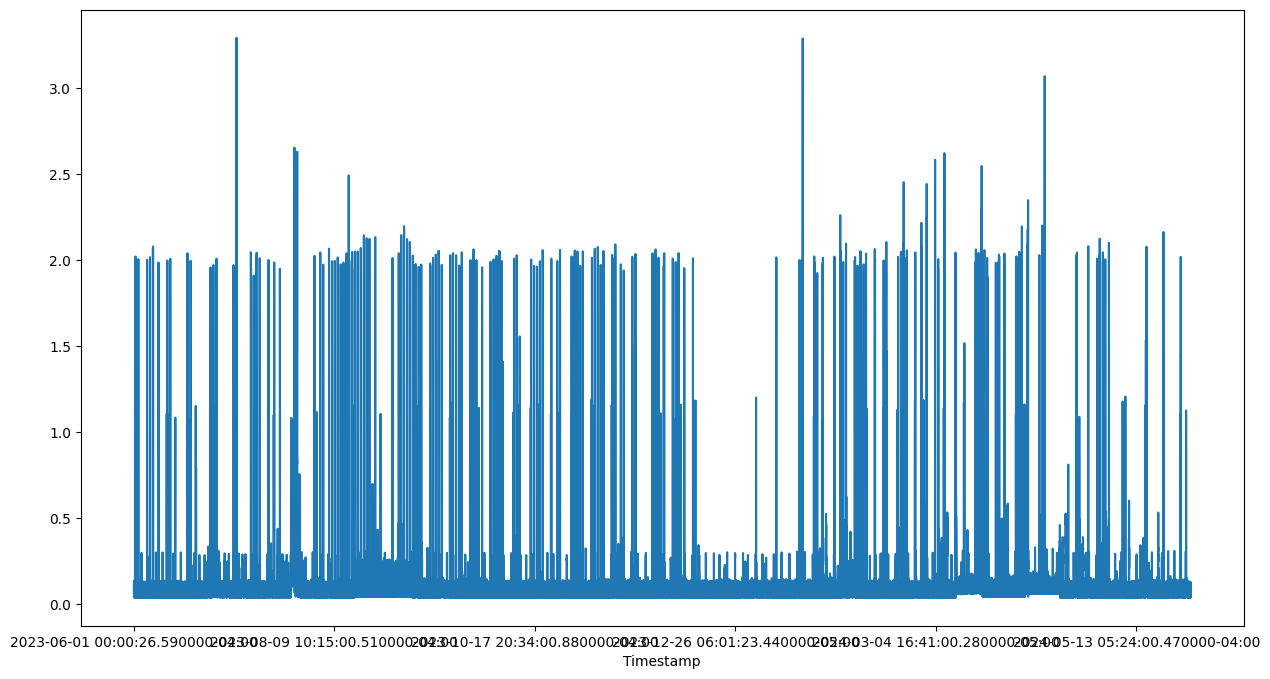

In [18]:
Load_0['Basement_plug_load (kW)'].plot(figsize=(15, 8))

In [19]:
Load_0

,Basement_plug_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:26.590000-04:00,0.107957,0,True
2023-06-01 00:01:00.570000-04:00,0.107872,0,True
2023-06-01 00:02:02.040000-04:00,0.107440,0,True
2023-06-01 00:03:00.570000-04:00,0.087420,0,True
2023-06-01 00:04:00.560000-04:00,0.087277,0,True
...,...,...,...
2024-05-31 23:55:00.420000-04:00,0.062790,0,True
2024-05-31 23:56:00.390000-04:00,0.063028,0,True
2024-05-31 23:57:00.420000-04:00,0.063310,0,True


In [20]:
temp = Load_0.diff()
temp.sort_values(by='Basement_plug_load (kW)', ascending=True)[:10]

,Basement_plug_load (kW),Quality,QualityGood
Timestamp,,,
2024-03-20 13:04:00.860000-04:00,-2.052983,0.0,False
2024-02-22 12:23:00.740000-05:00,-2.002099,0.0,False
2024-04-05 15:47:00.120000-04:00,-1.999907,0.0,False
2024-01-31 13:24:00.990000-05:00,-1.987408,0.0,False
2024-02-22 13:49:00.740000-05:00,-1.984775,0.0,False
2024-04-26 12:30:00.250000-04:00,-1.984633,0.0,False
2024-05-03 16:18:01.040000-04:00,-1.967181,0.0,False
2023-06-07 14:06:00.700000-04:00,-1.965807,0.0,False
2024-02-28 14:28:00.420000-05:00,-1.964540,0.0,False


In [20]:
#Uncomment this only if you really need to see the plots, but this takes very long to run (Approximately 140 minutes)

# import datetime
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("whitegrid")
# # sns.set_context("poster")

# def plot_outliers(df_original, col1_name, df_outliers, col2_name):
#   # Create figure and plot space
#     fig, ax = plt.subplots(figsize=(15, 8))
#     # Add x-axis and y-axis
#     ax.plot(df_original.index.values,
#           df_original[col1_name],linewidth=1,
#           color='grey')
#     ax.plot(df_outliers.index.values,
#           df_outliers[col2_name],"o",linewidth=2,markersize=3,
#           color='red')
#     ax.legend(['data', 'outliers'], loc='center left', bbox_to_anchor=(1, 0.5))
#     ax.set(title="Plotting Outliers", 
#          xlabel="Date",
#          ylabel=col1_name)
#     plt.setp(ax.get_xticklabels(), rotation=0)

#     plt.show()


In [21]:
name = "Plug_Basement"

# Select the column and create the DataFrame
df_no_outliers = pd.DataFrame(Load_0['Basement_plug_load (kW)'].values, index=Load_0['Basement_plug_load (kW)'].index, columns=[name])

# Display the resulting DataFrame
print(df_no_outliers)

                                  Plug_Basement
Timestamp                                      
2023-06-01 00:00:26.590000-04:00       0.107957
2023-06-01 00:01:00.570000-04:00       0.107872
2023-06-01 00:02:02.040000-04:00       0.107440
2023-06-01 00:03:00.570000-04:00       0.087420
2023-06-01 00:04:00.560000-04:00       0.087277
...                                         ...
2024-05-31 23:55:00.420000-04:00       0.062790
2024-05-31 23:56:00.390000-04:00       0.063028
2024-05-31 23:57:00.420000-04:00       0.063310
2024-05-31 23:58:00.420000-04:00       0.063092
2024-05-31 23:59:00.400000-04:00       0.062766

[527033 rows x 1 columns]


In [23]:
df_no_outliers.head()

,Plug_Basement
Timestamp,
2023-06-01 00:00:26.590000-04:00,0.107957
2023-06-01 00:01:00.570000-04:00,0.107872
2023-06-01 00:02:02.040000-04:00,0.107440
2023-06-01 00:03:00.570000-04:00,0.087420
2023-06-01 00:04:00.560000-04:00,0.087277


C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

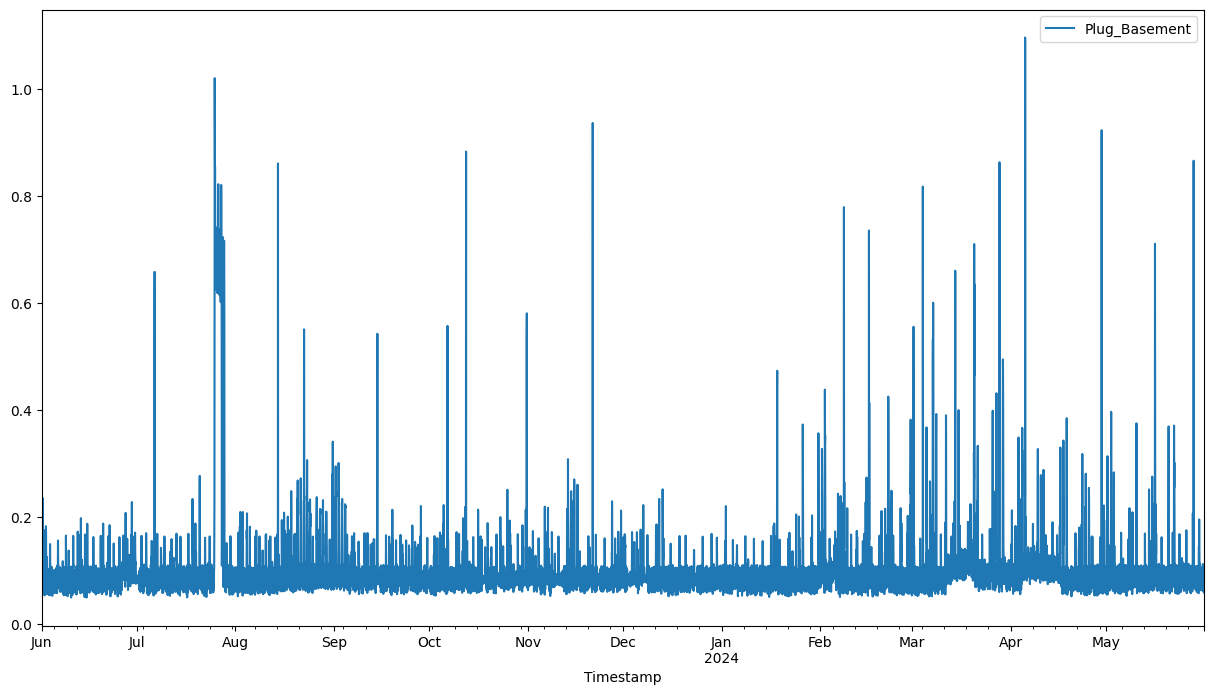

In [24]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [25]:
df_no_outliers

,Plug_Basement
Timestamp,
2023-06-01 00:00:00-04:00,0.060557
2023-06-01 01:00:00-04:00,0.092682
2023-06-01 02:00:00-04:00,0.101246
2023-06-01 03:00:00-04:00,0.055301
2023-06-01 04:00:00-04:00,0.107533
...,...
2024-05-31 19:00:00-04:00,0.067405
2024-05-31 20:00:00-04:00,0.109061
2024-05-31 21:00:00-04:00,0.058550


In [26]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\BasementPlug_Year4.csv")

In [27]:
Load_1 = pd.read_csv(os.path.join(dir_path, res[1]),parse_dates=['Timestamp'], index_col=[0])
Load_1.head()

,Basement_SHNT_cabinet_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.040000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.520000-04:00,0.003087,0,True
2023-06-01 00:01:00.520000-04:00,0.003087,0,True
2023-06-01 00:02:01.970000-04:00,0.003087,0,True
2023-06-01 00:03:00.520000-04:00,0.003087,0,True


In [28]:
Load_1 = Load_1[Load_1['QualityGood'] == True]

In [29]:
Load_1.describe()

,Basement_SHNT_cabinet_load (kW),Quality
count,526995.000000,5.269950e+05
mean,0.003005,1.281872e+10
std,0.000125,1.899471e+12
min,0.002739,0.000000e+00
25%,0.002858,0.000000e+00
50%,0.003080,0.000000e+00
75%,0.003107,0.000000e+00
max,0.003246,2.814750e+14


In [30]:
Load_1['Basement_SHNT_cabinet_load (kW)'] = Load_1['Basement_SHNT_cabinet_load (kW)'].where((Load_1['Basement_SHNT_cabinet_load (kW)'] < 1) & (Load_1['Basement_SHNT_cabinet_load (kW)'] >= 0), np.nan)

<Axes: xlabel='Timestamp'>

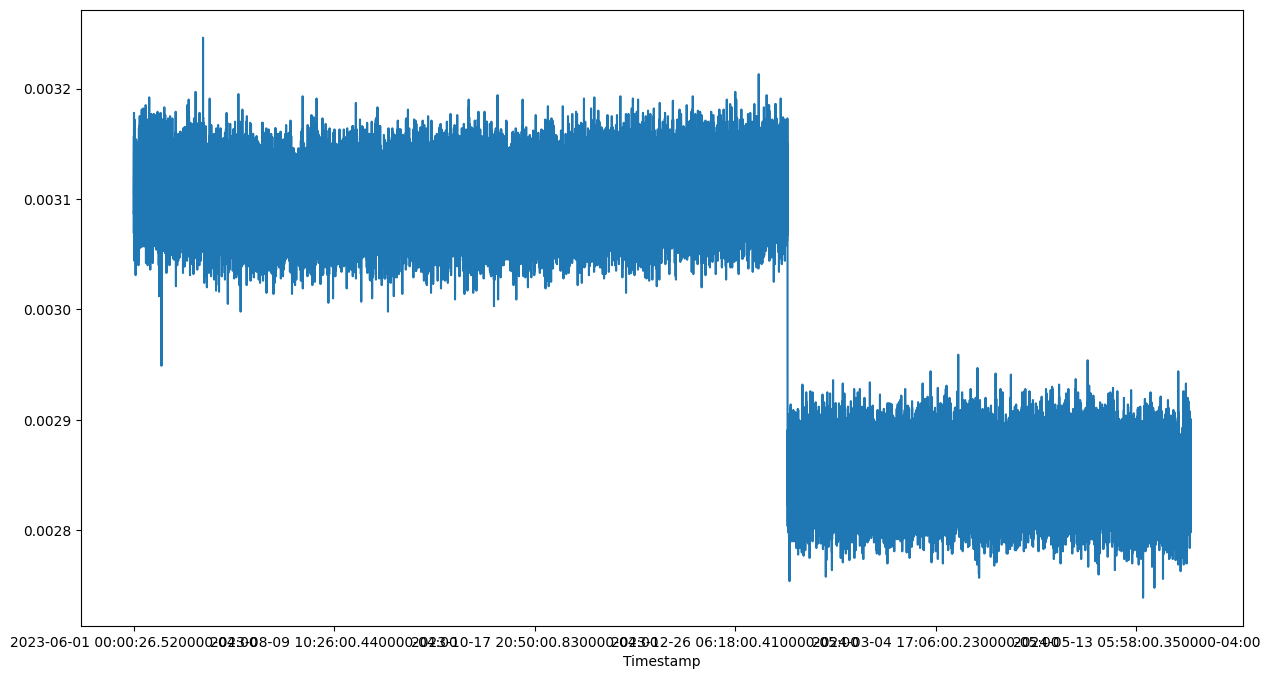

In [31]:
Load_1['Basement_SHNT_cabinet_load (kW)'].plot(figsize=(15, 8))

['HZ_Basement_plug_load_060120-053121_raw.csv', 'HZ_Basement_SHNT_cabinet_load_060120-053121_raw.csv', 'HZ_Cooling_pump_load_060120-053121_raw.csv', 'HZ_Electric_hot_water_load_060120-053121_raw.csv', 'HZ_Elevator_lighting_load_060120-053121_raw.csv', 'HZ_Elevator_load_060120-053121_raw.csv', 'HZ_Exhaust_fan_load_060120-053121_raw.csv', 'HZ_First_floor_plug_load_060120-053121_raw.csv', 'HZ_Heat_pump_load_060120-053121_raw.csv', 'HZ_IT_load_060120-053121_raw.csv', 'HZ_Lighting_load_060120-053121_raw.csv', 'HZ_Plug_third_floor_load_060120-053121_raw.csv', 'HZ_Second_floor_plug_load_060120-053121_raw.csv', 'HZ_Solar_hot_water_load_060120-053121_raw.csv', 'HZ_Solar_rapid_shutdown_load_060120-053121_raw.csv', 'HZ_WindowMaster_load_060120-053121_raw.csv', 'HZ_ZR_LV_RM_XH_load_060120-053121_raw.csv']

In [32]:
Load_1.describe()

,Basement_SHNT_cabinet_load (kW),Quality
count,526995.000000,5.269950e+05
mean,0.003005,1.281872e+10
std,0.000125,1.899471e+12
min,0.002739,0.000000e+00
25%,0.002858,0.000000e+00
50%,0.003080,0.000000e+00
75%,0.003107,0.000000e+00
max,0.003246,2.814750e+14


In [33]:
def find_outliers_Zscore(df):

    z1_mean = df.mean()
    z1_std = df.std()
    outliers = df[(df<-4 * z1_std + z1_mean) | (df>(4 * z1_std + z1_mean))]

    return outliers

def remove_outliers_Zscore(df):

    z1_mean = df.mean()
    z1_std = df.std()
    no_outliers = df[(df> (-4 * z1_std + z1_mean)) & (df< (4 * z1_std + z1_mean))]

    return no_outliers


outliers_z1 = find_outliers_Zscore(Load_1['Basement_SHNT_cabinet_load (kW)'])
no_outliers_z1 = remove_outliers_Zscore(Load_1['Basement_SHNT_cabinet_load (kW)'])

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Battery cabinet"])

# plot_outliers(Load_1, "Basement_SHNT_cabinet_load (kW)", df_outliers, 'outliers_z1')

In [34]:
df_no_outliers.describe()

,Battery cabinet
count,526995.000000
mean,0.003005
std,0.000125
min,0.002739
25%,0.002858
50%,0.003080
75%,0.003107
max,0.003246


In [35]:
df_no_outliers

,Battery cabinet
Timestamp,
2023-06-01 00:00:26.520000-04:00,0.003087
2023-06-01 00:01:00.520000-04:00,0.003087
2023-06-01 00:02:01.970000-04:00,0.003087
2023-06-01 00:03:00.520000-04:00,0.003087
2023-06-01 00:04:00.520000-04:00,0.003087
...,...
2024-05-31 23:55:00.370000-04:00,0.002848
2024-05-31 23:56:00.340000-04:00,0.002848
2024-05-31 23:57:00.350000-04:00,0.002848


C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

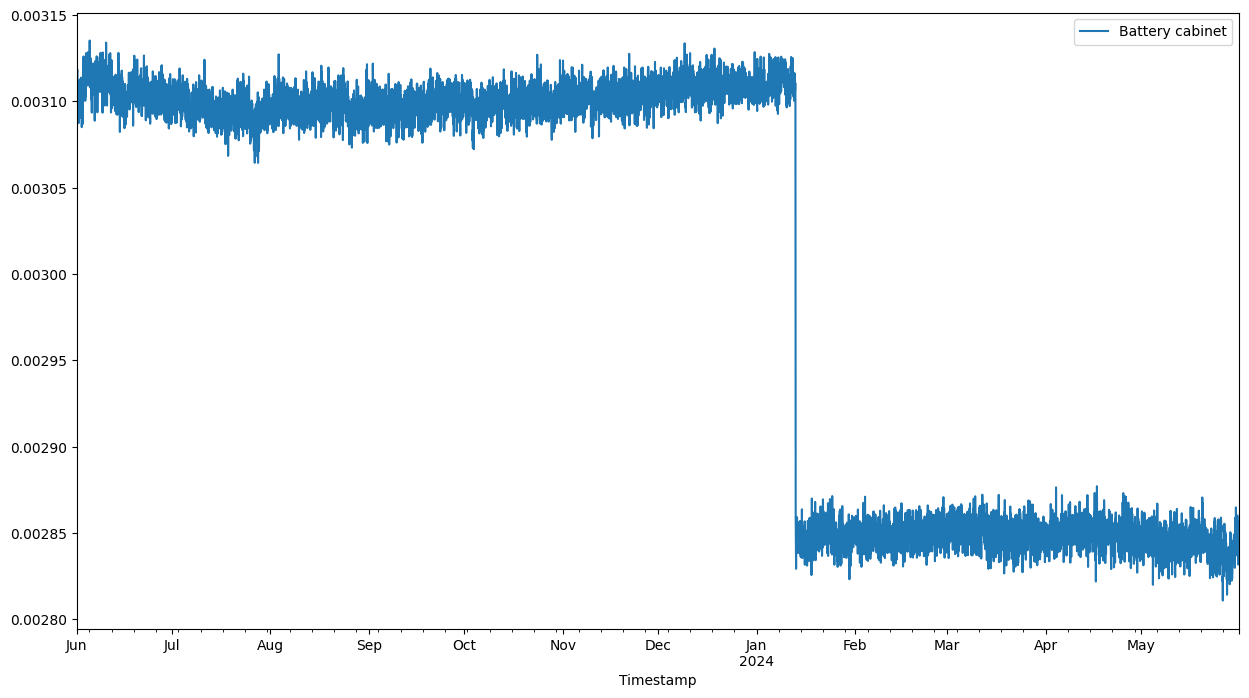

In [36]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [37]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\SHNT_cabinet_Year4.csv")

In [38]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[2]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Cooling_pump_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.090000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.560000-04:00,0.001897,0,True
2023-06-01 00:01:00.550000-04:00,0.001897,0,True
2023-06-01 00:02:02.010000-04:00,0.001897,0,True
2023-06-01 00:03:00.550000-04:00,0.001897,0,True


In [39]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [40]:
Load_2.describe()

,Cooling_pump_load (kW),Quality
count,527034.000000,5.270340e+05
mean,0.029484,1.281777e+10
std,0.067459,1.899401e+12
min,-0.000051,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.001926,0.000000e+00
max,0.274822,2.814750e+14


In [41]:
Load_2['Cooling_pump_load (kW)'] = Load_2['Cooling_pump_load (kW)'].where((Load_2['Cooling_pump_load (kW)'] < 1) & (Load_2['Cooling_pump_load (kW)'] >= 0), np.nan)

In [42]:
Load_2

,Cooling_pump_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:26.560000-04:00,0.001897,0,True
2023-06-01 00:01:00.550000-04:00,0.001897,0,True
2023-06-01 00:02:02.010000-04:00,0.001897,0,True
2023-06-01 00:03:00.550000-04:00,0.001897,0,True
2023-06-01 00:04:00.550000-04:00,0.001897,0,True
...,...,...,...
2024-05-31 23:55:00.400000-04:00,0.001913,0,True
2024-05-31 23:56:00.370000-04:00,0.001913,0,True
2024-05-31 23:57:00.390000-04:00,0.001913,0,True


In [43]:
outliers_z1 = find_outliers_Zscore(Load_2['Cooling_pump_load (kW)'])
no_outliers_z1 = remove_outliers_Zscore(Load_2['Cooling_pump_load (kW)'])

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Cooling"])

# plot_outliers(Load_2, "Cooling_pump_load (kW)", df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

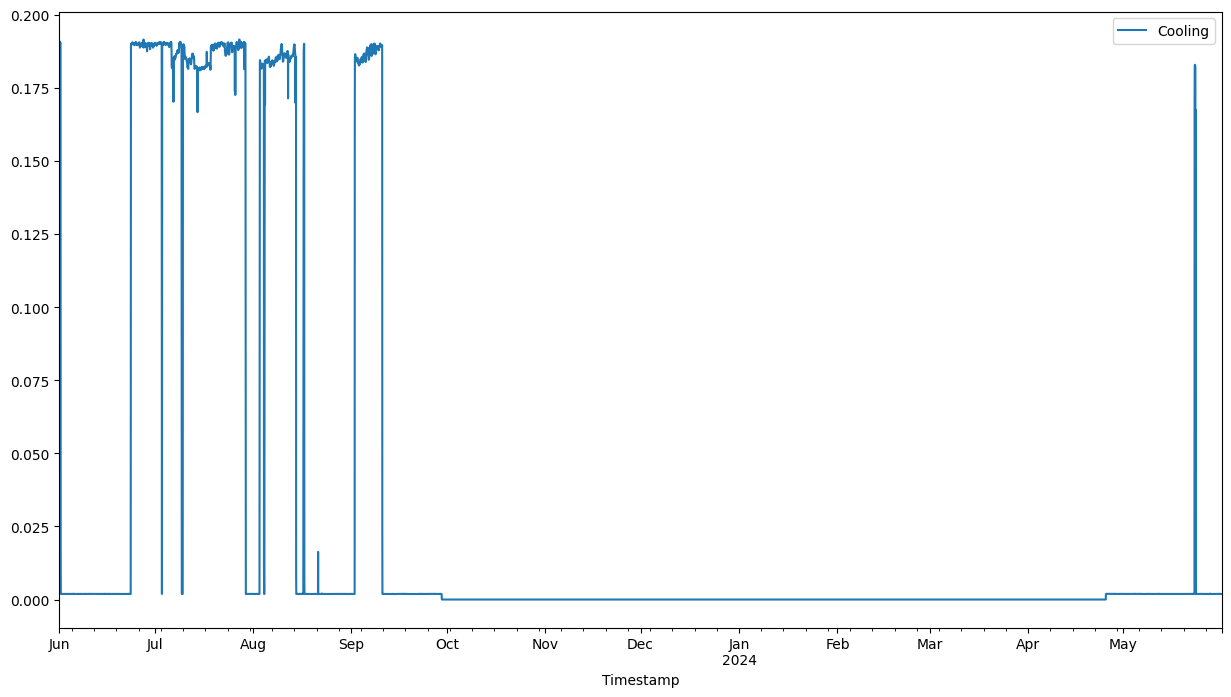

In [44]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [45]:
df_no_outliers

,Cooling
Timestamp,
2023-06-01 00:00:00-04:00,0.079349
2023-06-01 01:00:00-04:00,0.190846
2023-06-01 02:00:00-04:00,0.190826
2023-06-01 03:00:00-04:00,0.190585
2023-06-01 04:00:00-04:00,0.190497
...,...
2024-05-31 19:00:00-04:00,0.001915
2024-05-31 20:00:00-04:00,0.001911
2024-05-31 21:00:00-04:00,0.001904


In [46]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\Cooling_Year4.csv")

In [47]:
Load_3 = pd.read_csv(os.path.join(dir_path, res[3]),parse_dates=['Timestamp'], index_col=[0])
Load_3

,Electric_hot_water_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.110000-04:00,-1.0,1099511627776,False
2023-06-01 00:00:26.560000-04:00,0.0,0,True
2023-06-01 00:01:00.550000-04:00,0.0,0,True
2023-06-01 00:02:02.010000-04:00,0.0,0,True
2023-06-01 00:03:00.550000-04:00,0.0,0,True
...,...,...,...
2024-05-31 23:55:00.400000-04:00,0.0,0,True
2024-05-31 23:56:00.370000-04:00,0.0,0,True
2024-05-31 23:57:00.390000-04:00,0.0,0,True


In [48]:
Load_3 = Load_3[Load_3['QualityGood'] == True]

<Axes: xlabel='Timestamp'>

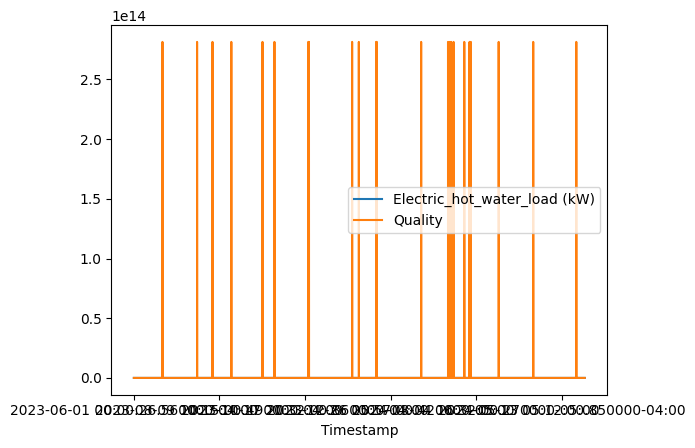

In [49]:
Load_3.plot()

In [50]:
Load_3.describe()

,Electric_hot_water_load (kW),Quality
count,527044.000000,5.270440e+05
mean,0.029947,1.281752e+10
std,0.379297,1.899383e+12
min,-0.000102,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.000000,0.000000e+00
max,5.185533,2.814750e+14


<Axes: xlabel='Timestamp'>

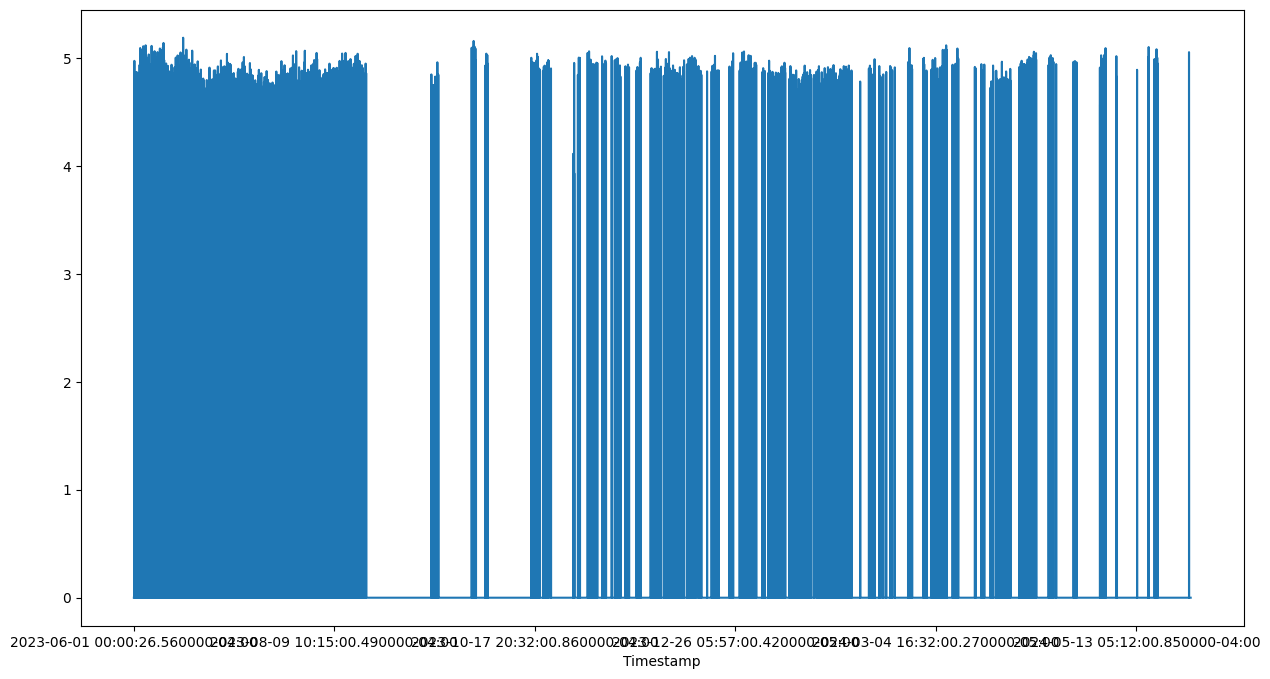

In [51]:
Load_3['Electric_hot_water_load (kW)'].plot(figsize=(15, 8))

In [52]:
Load_3

,Electric_hot_water_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:26.560000-04:00,0.0,0,True
2023-06-01 00:01:00.550000-04:00,0.0,0,True
2023-06-01 00:02:02.010000-04:00,0.0,0,True
2023-06-01 00:03:00.550000-04:00,0.0,0,True
2023-06-01 00:04:00.550000-04:00,0.0,0,True
...,...,...,...
2024-05-31 23:55:00.400000-04:00,0.0,0,True
2024-05-31 23:56:00.370000-04:00,0.0,0,True
2024-05-31 23:57:00.390000-04:00,0.0,0,True


In [53]:
name = "Electric_hot_water_load (kW)"

df_no_outliers = pd.DataFrame(Load_3[name].values, index=Load_3[name].index, columns=["EHW"])

df_no_outliers

,EHW
Timestamp,
2023-06-01 00:00:26.560000-04:00,0.0
2023-06-01 00:01:00.550000-04:00,0.0
2023-06-01 00:02:02.010000-04:00,0.0
2023-06-01 00:03:00.550000-04:00,0.0
2023-06-01 00:04:00.550000-04:00,0.0
...,...
2024-05-31 23:55:00.400000-04:00,0.0
2024-05-31 23:56:00.370000-04:00,0.0
2024-05-31 23:57:00.390000-04:00,0.0


C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

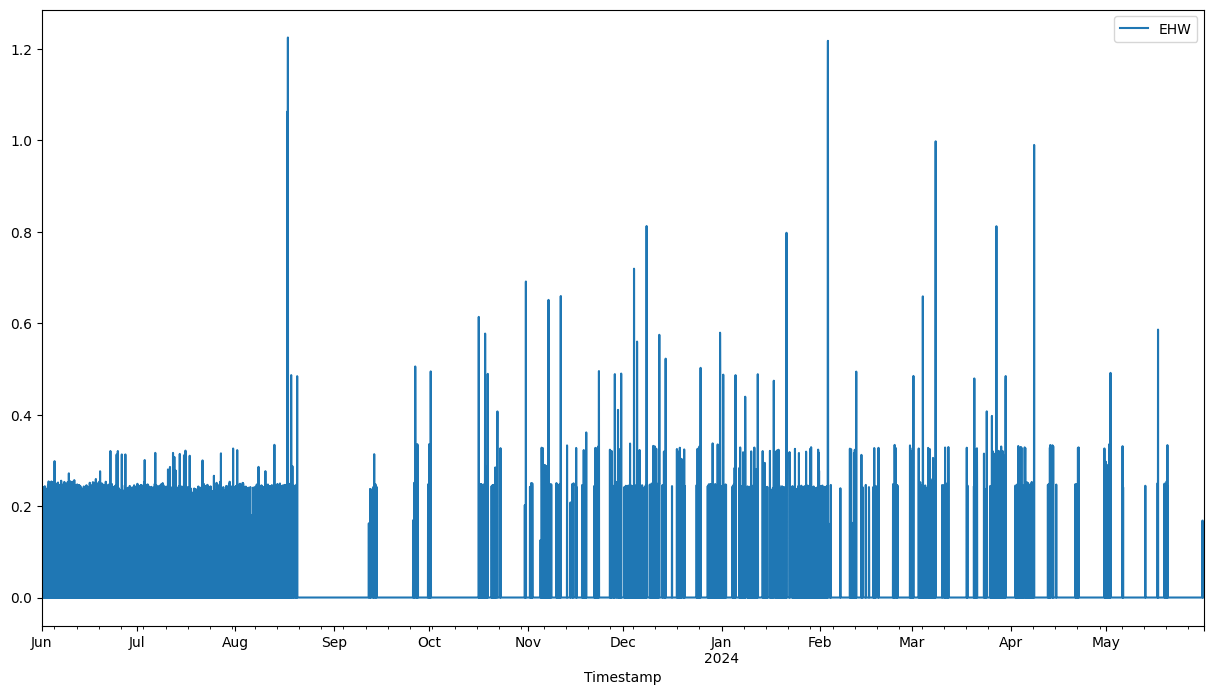

In [54]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [55]:
df_no_outliers.describe()

,EHW
count,8784.000000
mean,0.029946
std,0.090486
min,-0.000008
25%,0.000000
50%,0.000000
75%,0.000000
max,1.224976


In [56]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\EHW_Year4.csv")

In [57]:
Load_4 = pd.read_csv(os.path.join(dir_path, res[4]),parse_dates=['Timestamp'], index_col=[0])
Load_4.head()

,Elevator_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.500000-04:00,0.108542,0,True
2023-06-01 00:01:00.500000-04:00,0.108565,0,True
2023-06-01 00:02:01.950000-04:00,0.108664,0,True
2023-06-01 00:03:00.500000-04:00,0.107742,0,True


In [58]:
Load_4 = Load_4[Load_4['QualityGood'] == True]

<Axes: xlabel='Timestamp'>

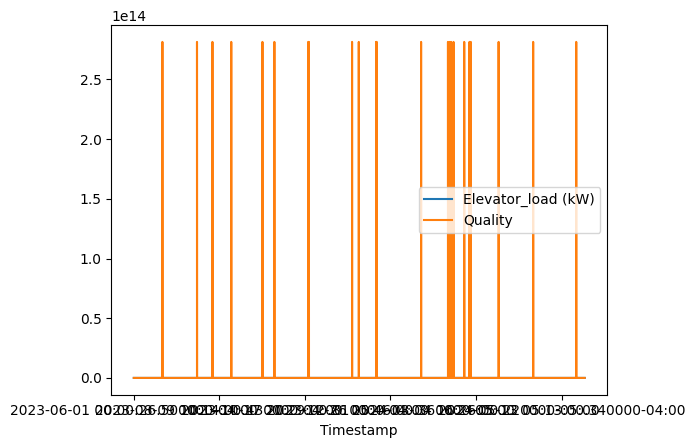

In [59]:
Load_4.plot()

In [60]:
Load_4.describe()

,Elevator_load (kW),Quality
count,527043.000000,5.270430e+05
mean,0.007842,1.281755e+10
std,0.030077,1.899385e+12
min,-0.000131,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.000000,0.000000e+00
max,3.499707,2.814750e+14


In [61]:
Load_4['Elevator_load (kW)'] = Load_4['Elevator_load (kW)'].where((Load_4['Elevator_load (kW)'] < 4) & (Load_4['Elevator_load (kW)'] >= 0), np.nan)

In [62]:
def find_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    outliers = df[(df<-k * z1_std + z1_mean) | (df>(k * z1_std + z1_mean))]

    return outliers

def remove_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    no_outliers = df[(df> (-k * z1_std + z1_mean)) & (df< (k * z1_std + z1_mean))]

    return no_outliers

name = "Elevator_load (kW)"

outliers_z1 = find_outliers_Zscore(Load_4[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_4[name], 5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["EL"])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

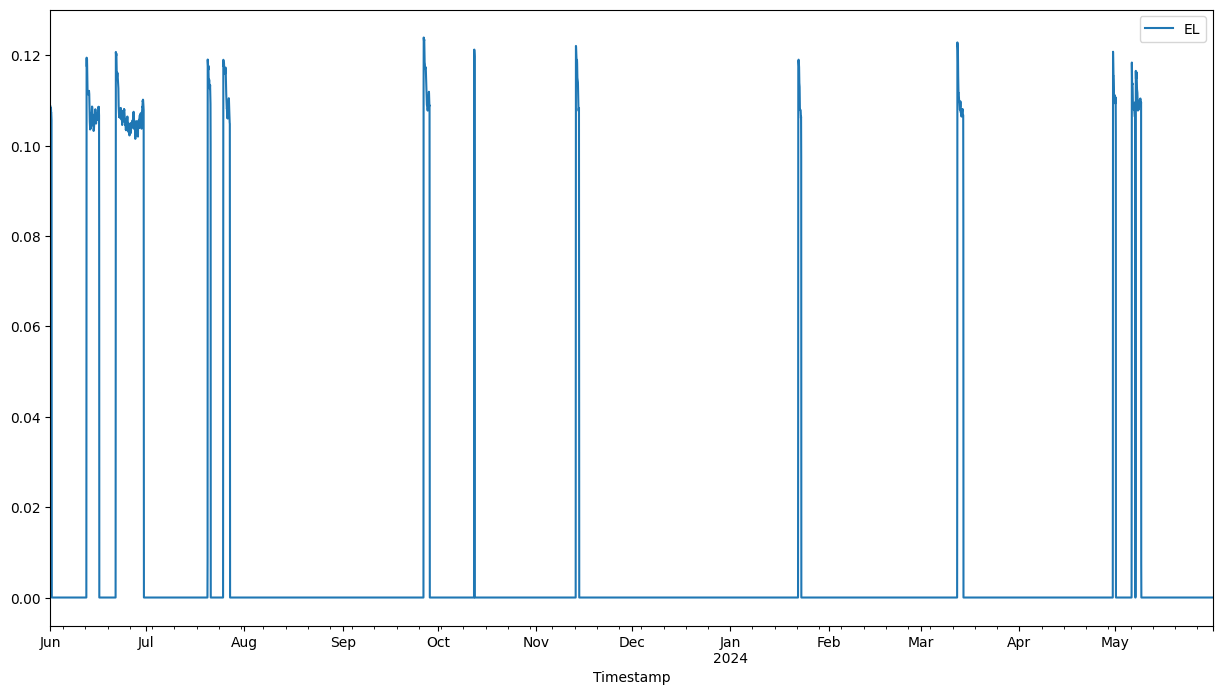

In [63]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [64]:
df_no_outliers

,EL
Timestamp,
2023-06-01 00:00:00-04:00,0.108641
2023-06-01 01:00:00-04:00,0.108183
2023-06-01 02:00:00-04:00,0.108065
2023-06-01 03:00:00-04:00,0.108362
2023-06-01 04:00:00-04:00,0.108168
...,...
2024-05-31 19:00:00-04:00,0.000000
2024-05-31 20:00:00-04:00,0.000000
2024-05-31 21:00:00-04:00,0.000000


In [65]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\EL_Year4.csv")

In [66]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[5]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Elevator_sumpump_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.130000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.570000-04:00,0.001172,0,True
2023-06-01 00:01:00.550000-04:00,0.001172,0,True
2023-06-01 00:02:02.020000-04:00,0.001172,0,True
2023-06-01 00:03:00.550000-04:00,0.001172,0,True


In [67]:
Load_2["Elevator_sumpump_load (kW)"].describe()

count    528288.000000
mean          0.001054
std           7.004713
min       -3600.000000
25%           0.001089
50%           0.001118
75%           0.001147
max        3600.000000
Name: Elevator_sumpump_load (kW), dtype: float64

In [68]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

<Axes: xlabel='Timestamp'>

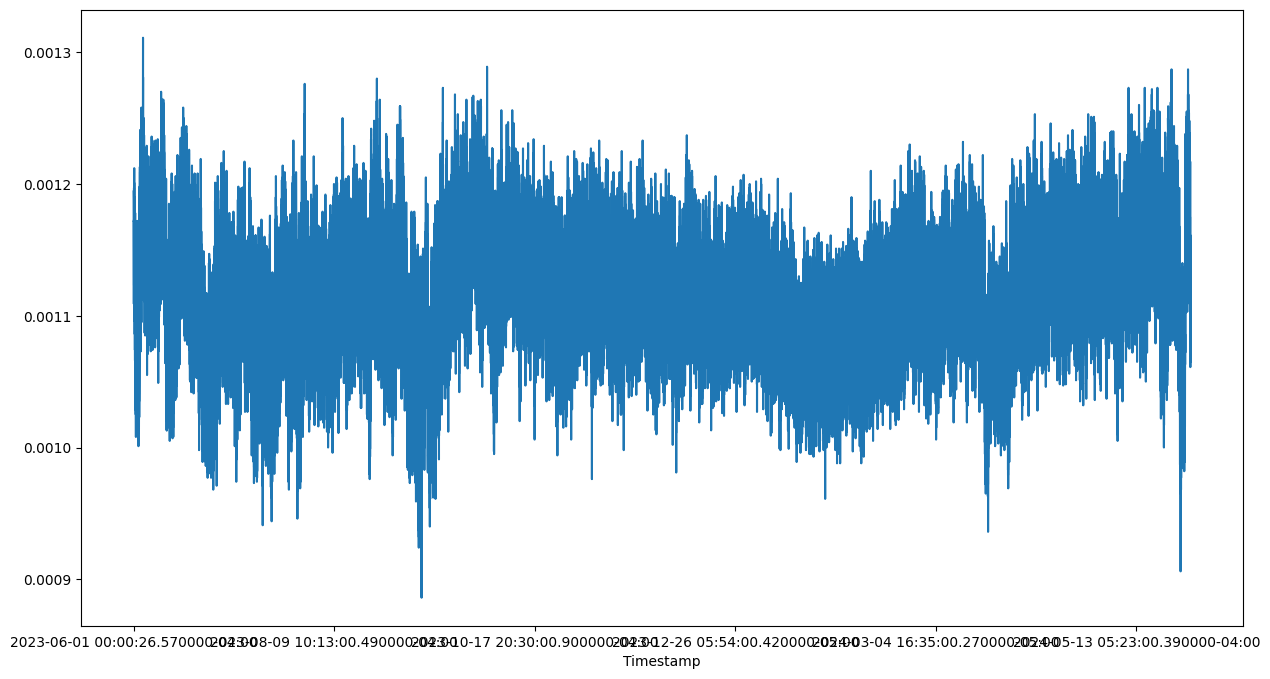

In [69]:
Load_2['Elevator_sumpump_load (kW)'].plot(figsize=(15,8))

In [70]:
Load_2["Elevator_sumpump_load (kW)"] = Load_2["Elevator_sumpump_load (kW)"].where((Load_2["Elevator_sumpump_load (kW)"] < 1) & (Load_2["Elevator_sumpump_load (kW)"] >= 0), np.nan)

In [71]:
name = "Elevator_sumpump_load (kW)"

outliers_z1 = find_outliers_Zscore(Load_2[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name], 5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Sumppump"])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

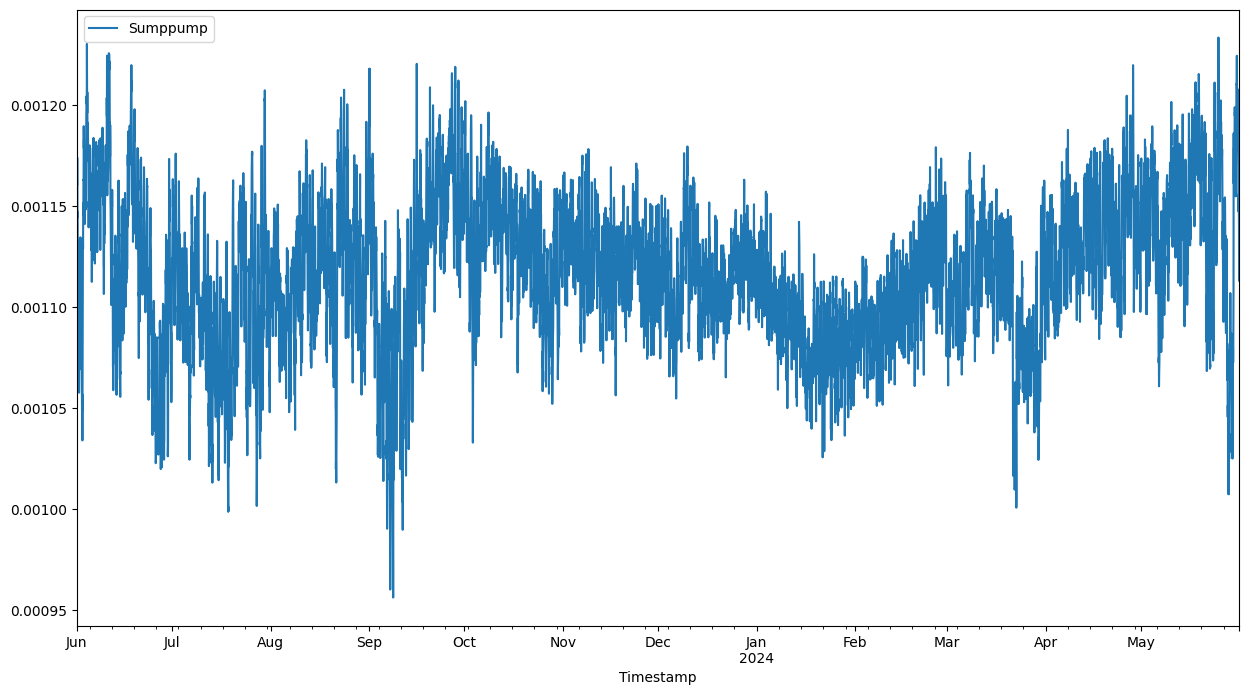

In [72]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [73]:
df_no_outliers

,Sumppump
Timestamp,
2023-06-01 00:00:00-04:00,0.001167
2023-06-01 01:00:00-04:00,0.001164
2023-06-01 02:00:00-04:00,0.001160
2023-06-01 03:00:00-04:00,0.001174
2023-06-01 04:00:00-04:00,0.001167
...,...
2024-05-31 19:00:00-04:00,0.001148
2024-05-31 20:00:00-04:00,0.001143
2024-05-31 21:00:00-04:00,0.001116


In [74]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\Elevator_sumppump_Year4.csv")

In [75]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[6]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Emergency_light_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.100000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.560000-04:00,0.048379,0,True
2023-06-01 00:01:00.550000-04:00,0.048379,0,True
2023-06-01 00:02:02.010000-04:00,0.048379,0,True
2023-06-01 00:03:00.550000-04:00,0.048379,0,True


In [76]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [77]:
Load_2.describe()

,Emergency_light_load (kW),Quality
count,527034.000000,5.270340e+05
mean,0.048352,1.281777e+10
std,0.006358,1.899401e+12
min,0.000000,0.000000e+00
25%,0.047082,0.000000e+00
50%,0.047762,0.000000e+00
75%,0.048429,0.000000e+00
max,0.187905,2.814750e+14


In [78]:
Load_2['Emergency_light_load (kW)'] = Load_2['Emergency_light_load (kW)'].where((Load_2['Emergency_light_load (kW)'] < 3) & (Load_2['Emergency_light_load (kW)'] >= 0), np.nan)

In [79]:
name = "Emergency_light_load (kW)"

outliers_z1 = find_outliers_Zscore(Load_2[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name], 5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Emergency light load"])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

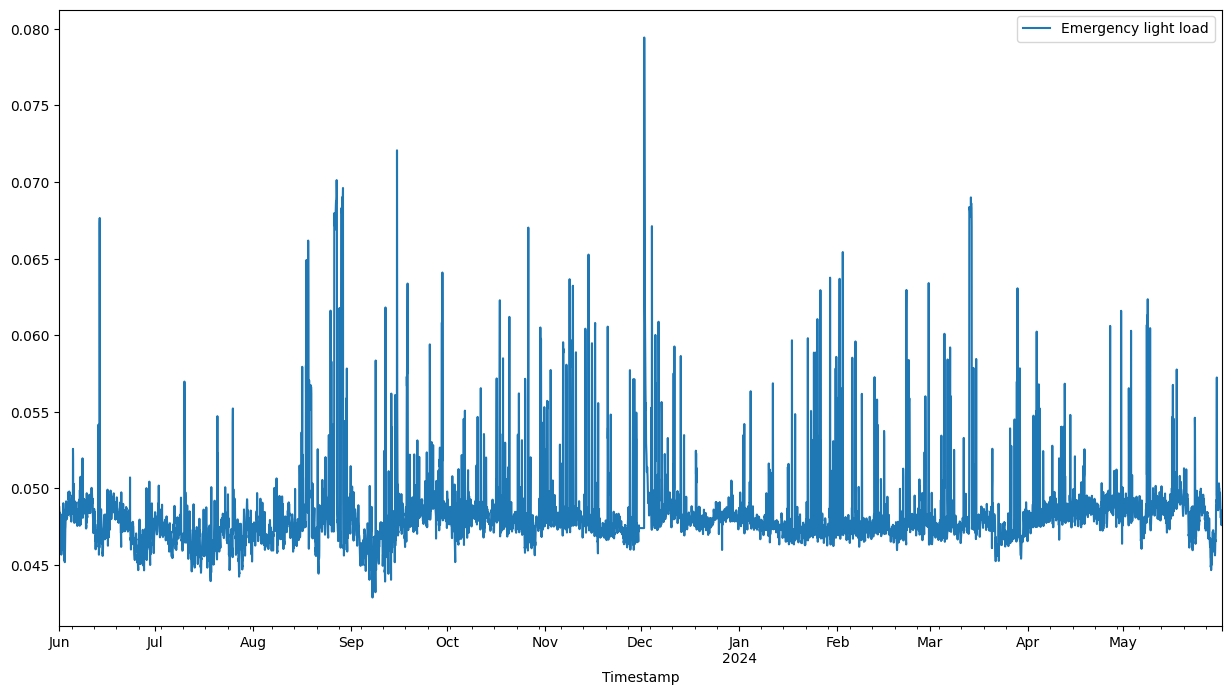

In [80]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [81]:
df_no_outliers

,Emergency light load
Timestamp,
2023-06-01 00:00:00-04:00,0.048765
2023-06-01 01:00:00-04:00,0.048407
2023-06-01 02:00:00-04:00,0.048290
2023-06-01 03:00:00-04:00,0.048419
2023-06-01 04:00:00-04:00,0.048289
...,...
2024-05-31 19:00:00-04:00,0.048503
2024-05-31 20:00:00-04:00,0.048086
2024-05-31 21:00:00-04:00,0.047590


In [82]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\ELL_Year4.csv")

In [83]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[7]),parse_dates=['Timestamp'], index_col=[0])
Load_2

,Exhaust_fan_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.100000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.560000-04:00,0.004076,0,True
2023-06-01 00:01:00.550000-04:00,0.004076,0,True
2023-06-01 00:02:02.010000-04:00,0.004076,0,True
2023-06-01 00:03:00.550000-04:00,0.004076,0,True
...,...,...,...
2024-05-31 23:55:00.400000-04:00,0.003928,0,True
2024-05-31 23:56:00.370000-04:00,0.003928,0,True
2024-05-31 23:57:00.390000-04:00,0.003928,0,True


In [84]:
Load_2.tail()

,Exhaust_fan_load (kW),Quality,QualityGood
Timestamp,,,
2024-05-31 23:55:00.400000-04:00,0.003928,0,True
2024-05-31 23:56:00.370000-04:00,0.003928,0,True
2024-05-31 23:57:00.390000-04:00,0.003928,0,True
2024-05-31 23:58:00.400000-04:00,0.003928,0,True
2024-05-31 23:59:00.390000-04:00,0.003897,0,True


In [85]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [86]:
Load_2.describe()

,Exhaust_fan_load (kW),Quality
count,527038.000000,5.270380e+05
mean,0.003935,1.281767e+10
std,0.000235,1.899394e+12
min,0.003554,0.000000e+00
25%,0.003871,0.000000e+00
50%,0.003933,0.000000e+00
75%,0.003995,0.000000e+00
max,0.029807,2.814750e+14


In [87]:
Load_2['Exhaust_fan_load (kW)'] = Load_2['Exhaust_fan_load (kW)'].where((Load_2['Exhaust_fan_load (kW)'] < 1) & (Load_2['Exhaust_fan_load (kW)'] >= 0), np.nan)

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\496511184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Load_2['Exhaust_fan_load (kW)'] = Load_2['Exhaust_fan_load (kW)'].where((Load_2['Exhaust_fan_load (kW)'] < 1) & (Load_2['Exhaust_fan_load (kW)'] >= 0), np.nan)


In [88]:
name = "Exhaust_fan_load (kW)"

outliers_z1 = find_outliers_Zscore(Load_2[name], 2)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name], 2)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Exhaust fan"])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

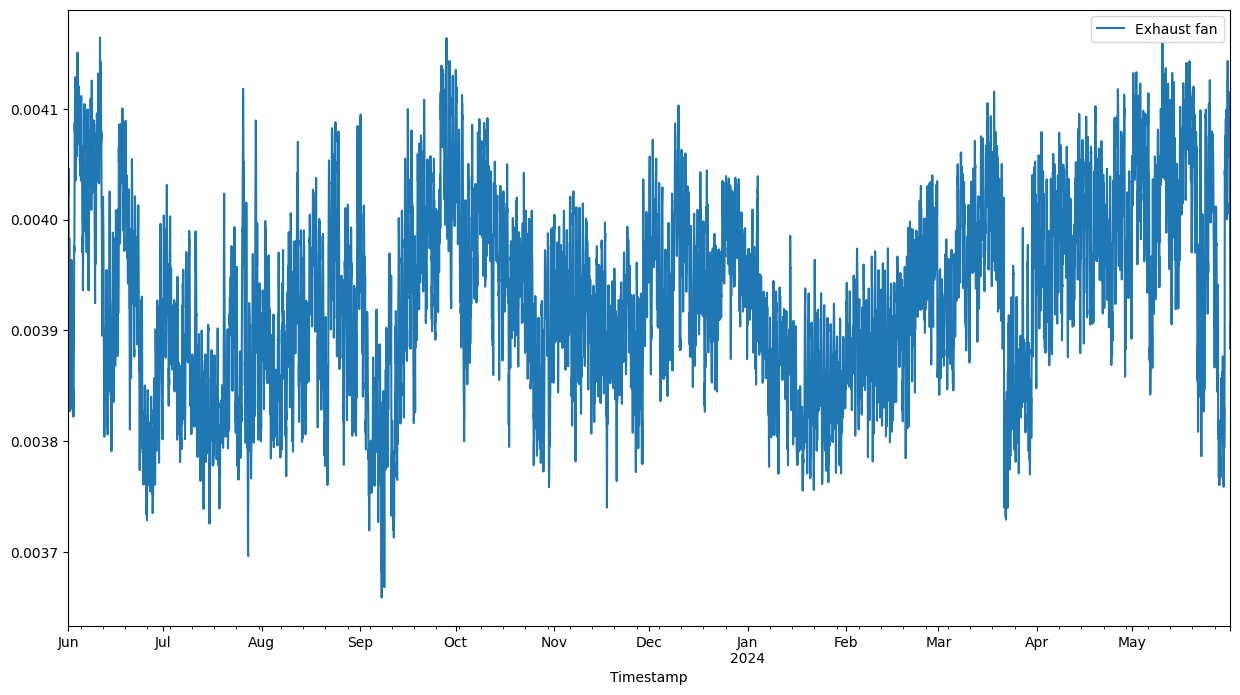

In [89]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [90]:
df_no_outliers

,Exhaust fan
Timestamp,
2023-06-01 00:00:00-04:00,0.004065
2023-06-01 01:00:00-04:00,0.004040
2023-06-01 02:00:00-04:00,0.004022
2023-06-01 03:00:00-04:00,0.004046
2023-06-01 04:00:00-04:00,0.004023
...,...
2024-05-31 19:00:00-04:00,0.004002
2024-05-31 20:00:00-04:00,0.003961
2024-05-31 21:00:00-04:00,0.003898


In [91]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\EF_Year4.csv")

In [92]:
res

['HZ_Basement_plug_load_060123-053124_raw.csv',
 'HZ_Basement_SHNT_cabinet_load_060123-053124_raw.csv',
 'HZ_Cooling_pump_load_060123-053124_raw.csv',
 'HZ_Electric_hot_water_load_060123-053124_raw.csv',
 'HZ_Elevator_load_060123-053124_raw.csv',
 'HZ_Elevator_sumpump_load_060123-053124_raw.csv',
 'HZ_Emergency_light_load_060123-053124_raw.csv',
 'HZ_Exhaust_fan_load_060123-053124_raw.csv',
 'HZ_Fire_alarm_panel_load_060123-053124_raw.csv',
 'HZ_First_floor_plug_load_060123-053124_raw.csv',
 'HZ_Heat_pump_electric_load_060123-053124_raw.csv',
 'HZ_Heat_pump_load_060123-053124_raw.csv',
 'HZ_IT_load_060123-053124_raw.csv',
 'HZ_Lighting_load_060123-053124_raw.csv',
 'HZ_Main_load_060123-053124_raw.csv',
 'HZ_Plug_third_floor_load_060123-053124_raw.csv',
 'HZ_PV_meter1_load_060123-053124_raw.csv',
 'HZ_PV_meter2_load_060123-053124_raw.csv',
 'HZ_Second_floor_plug_load_060123-053124_raw.csv',
 'HZ_Solar_hot_water_load_060123-053124_raw.csv',
 'HZ_Solar_rapid_shutdown_load_060123-053124_ra

In [93]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[8]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Fire_alarm_panel_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.130000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.570000-04:00,0.070192,0,True
2023-06-01 00:01:00.550000-04:00,0.066966,0,True
2023-06-01 00:02:02.020000-04:00,0.067777,0,True
2023-06-01 00:03:00.550000-04:00,0.055140,0,True


In [94]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

<Axes: xlabel='Timestamp'>

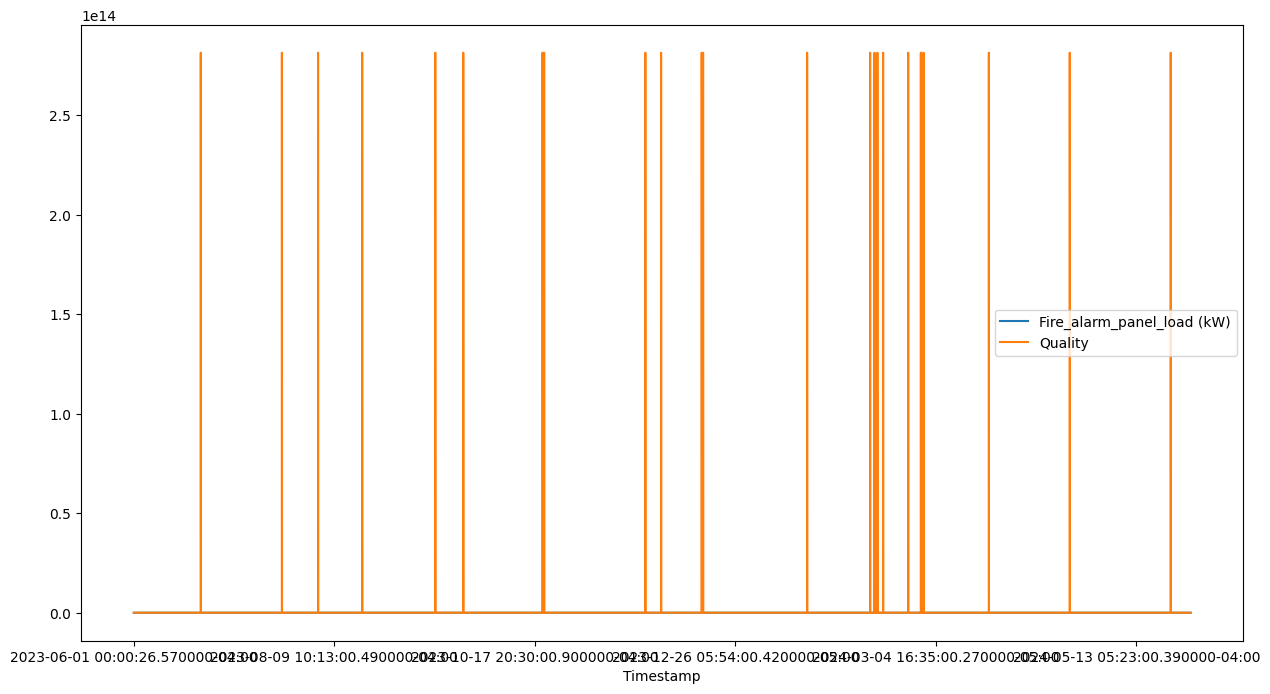

In [95]:
Load_2.plot(figsize=(15, 8))

In [96]:
name = "Fire_alarm_panel_load (kW)"

outliers_z1 = find_outliers_Zscore(Load_2[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name], 5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Fire alarm"])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

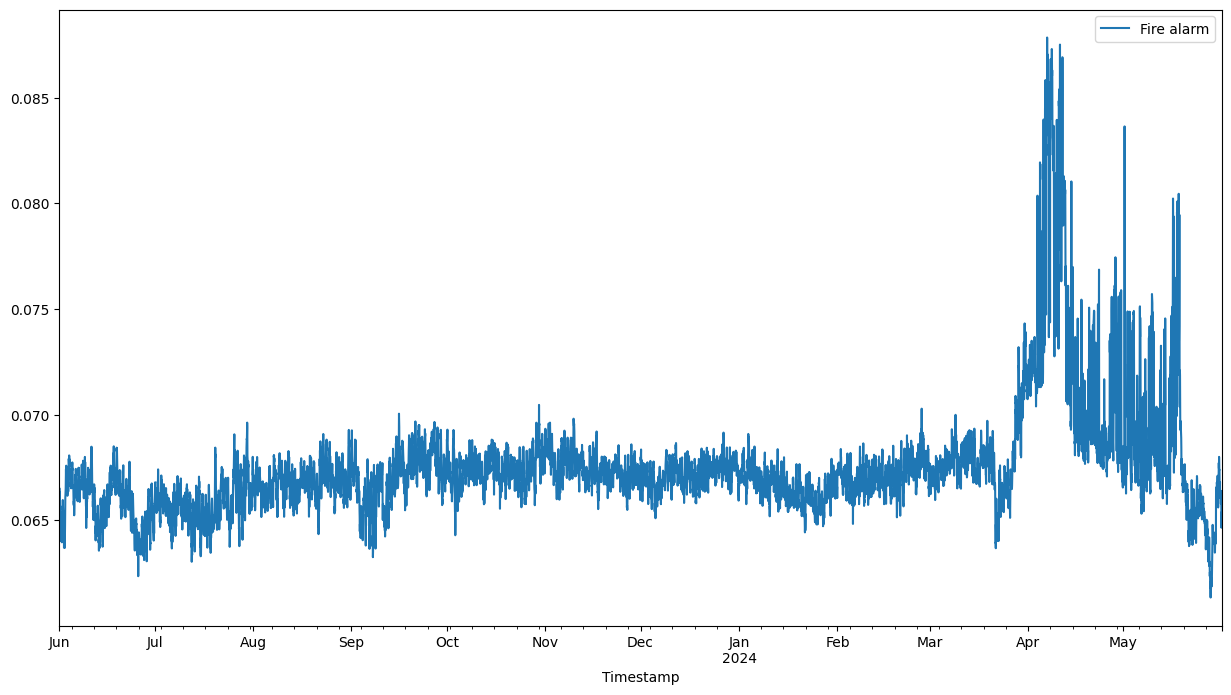

In [97]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [98]:
df_no_outliers

,Fire alarm
Timestamp,
2023-06-01 00:00:00-04:00,0.066298
2023-06-01 01:00:00-04:00,0.066528
2023-06-01 02:00:00-04:00,0.066141
2023-06-01 03:00:00-04:00,0.065712
2023-06-01 04:00:00-04:00,0.066343
...,...
2024-05-31 19:00:00-04:00,0.066395
2024-05-31 20:00:00-04:00,0.065545
2024-05-31 21:00:00-04:00,0.064654


In [99]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\FA_Year4.csv")

In [100]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[9]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,First_floor_plug_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.190000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.580000-04:00,0.011731,0,True
2023-06-01 00:01:00.560000-04:00,0.011866,0,True
2023-06-01 00:02:02.030000-04:00,0.011924,0,True
2023-06-01 00:03:00.560000-04:00,0.011942,0,True


In [101]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

<Axes: xlabel='Timestamp'>

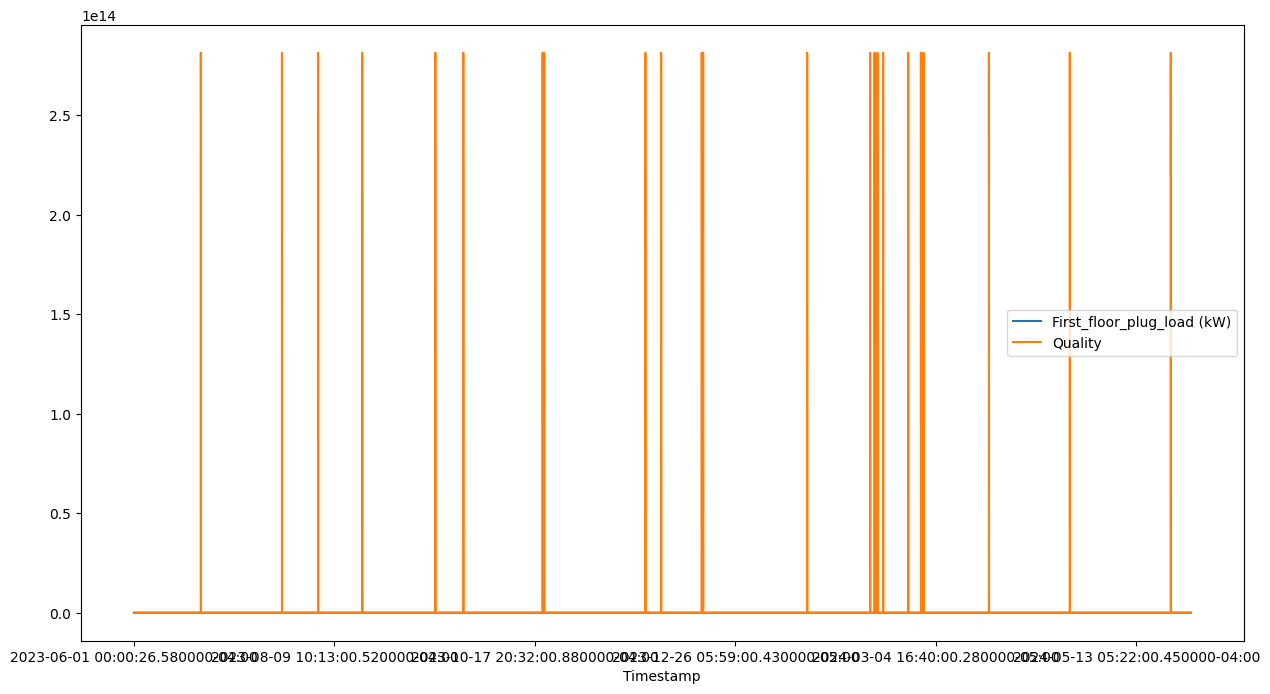

In [102]:
Load_2.plot(figsize=(15, 8))

<Axes: xlabel='Timestamp'>

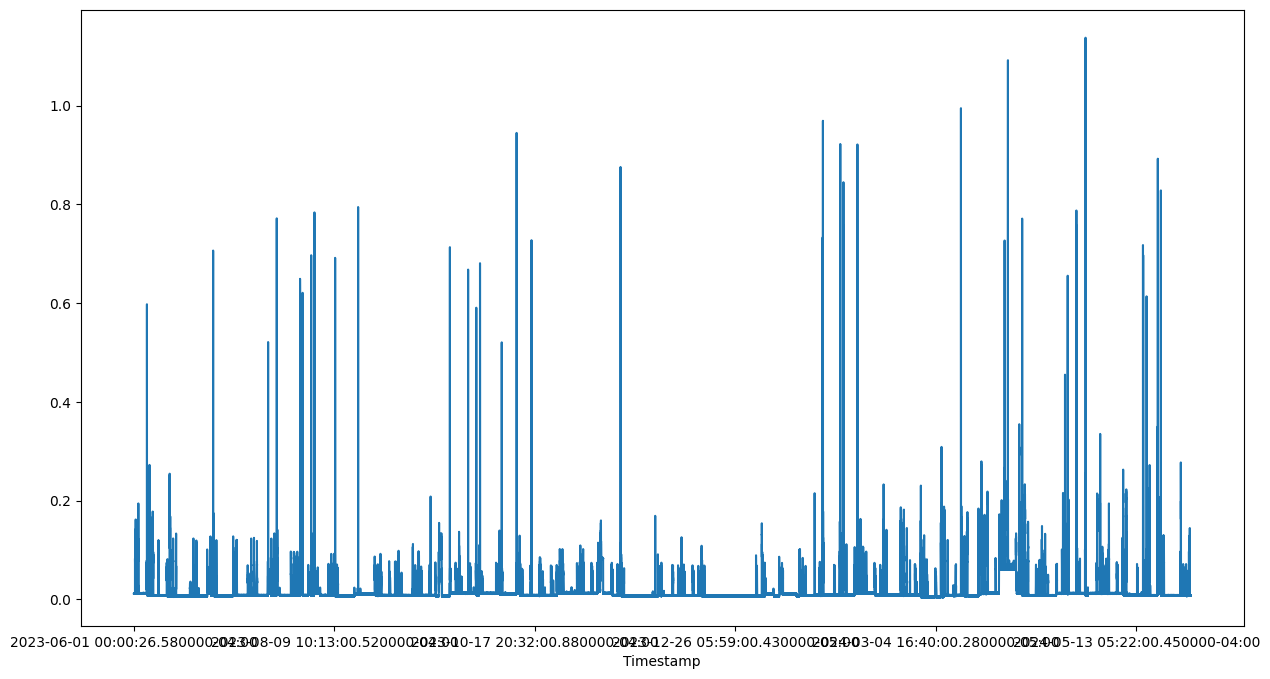

In [103]:
Load_2['First_floor_plug_load (kW)'].plot(figsize=(15, 8))

In [104]:
Load_2['First_floor_plug_load (kW)'].describe()

count    527035.000000
mean          0.016495
std           0.028598
min           0.003179
25%           0.007380
50%           0.008340
75%           0.012025
max           1.137704
Name: First_floor_plug_load (kW), dtype: float64

In [105]:
name = "First_floor_plug_load (kW)"

df_no_outliers = pd.DataFrame(Load_2[name].values, index=Load_2[name].index, columns=["Plug1"])

df_no_outliers

,Plug1
Timestamp,
2023-06-01 00:00:26.580000-04:00,0.011731
2023-06-01 00:01:00.560000-04:00,0.011866
2023-06-01 00:02:02.030000-04:00,0.011924
2023-06-01 00:03:00.560000-04:00,0.011942
2023-06-01 00:04:00.560000-04:00,0.011995
...,...
2024-05-31 23:55:00.410000-04:00,0.007727
2024-05-31 23:56:00.390000-04:00,0.007682
2024-05-31 23:57:00.410000-04:00,0.008541


C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

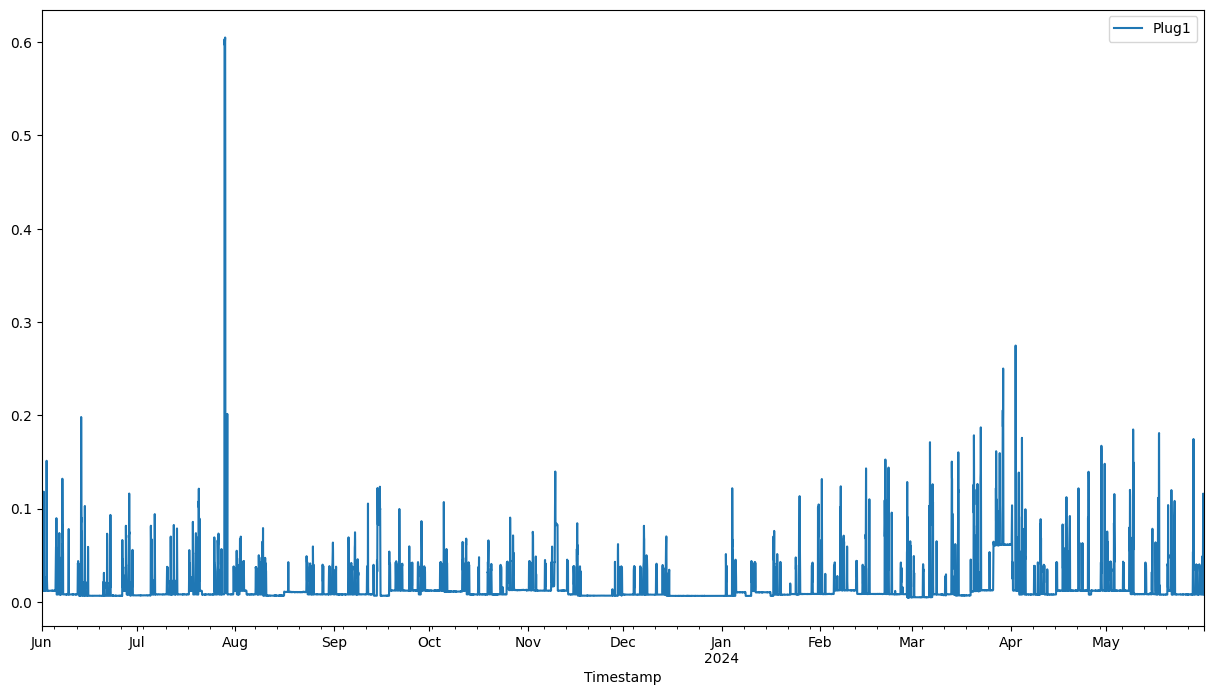

In [106]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [107]:
df_no_outliers

,Plug1
Timestamp,
2023-06-01 00:00:00-04:00,0.011848
2023-06-01 01:00:00-04:00,0.011866
2023-06-01 02:00:00-04:00,0.011925
2023-06-01 03:00:00-04:00,0.011769
2023-06-01 04:00:00-04:00,0.011947
...,...
2024-05-31 19:00:00-04:00,0.007877
2024-05-31 20:00:00-04:00,0.007708
2024-05-31 21:00:00-04:00,0.007723


In [108]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\Plug1_Year4.csv")

In [109]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[12]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,IT_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.160000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.580000-04:00,0.648281,0,True
2023-06-01 00:01:00.560000-04:00,0.648193,0,True
2023-06-01 00:02:02.030000-04:00,0.647693,0,True
2023-06-01 00:03:00.560000-04:00,0.652514,0,True


In [110]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [111]:
def find_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    outliers = df[(df<-k * z1_std + z1_mean) | (df>(k * z1_std + z1_mean)) | (df==0)]

    return outliers

def remove_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    no_outliers = df[(df> (-k * z1_std + z1_mean)) & (df< (k * z1_std + z1_mean)) & (df!=0)]

    return no_outliers

In [112]:
name = "IT_load (kW)"
col_name = "IT"

outliers_z1 = find_outliers_Zscore(Load_2[name],3)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],3)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

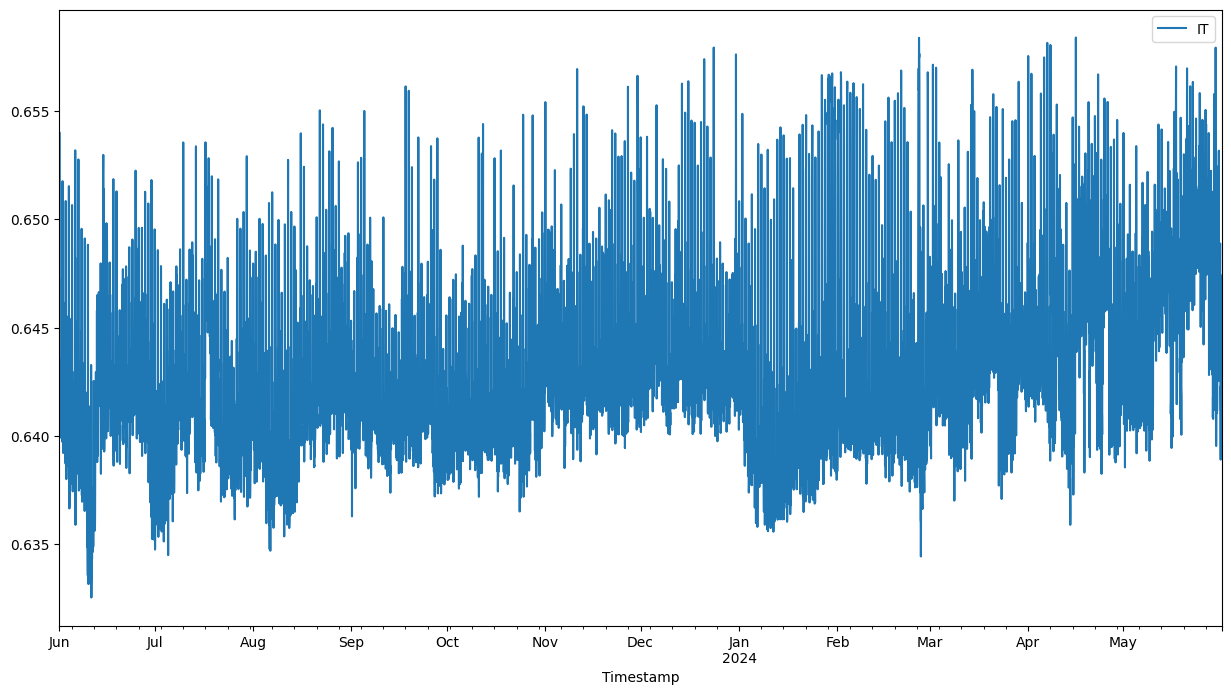

In [113]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [114]:
df_no_outliers

,IT
Timestamp,
2023-06-01 00:00:00-04:00,0.640311
2023-06-01 01:00:00-04:00,0.654028
2023-06-01 02:00:00-04:00,0.641614
2023-06-01 03:00:00-04:00,0.639907
2023-06-01 04:00:00-04:00,0.639982
...,...
2024-05-31 19:00:00-04:00,0.639871
2024-05-31 20:00:00-04:00,0.641741
2024-05-31 21:00:00-04:00,0.647415


In [115]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\IT_Year4.csv")

In [119]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[13]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Lighting_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.180000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.580000-04:00,0.002063,0,True
2023-06-01 00:01:00.560000-04:00,0.001984,0,True
2023-06-01 00:02:02.030000-04:00,0.002045,0,True
2023-06-01 00:03:00.560000-04:00,0.002040,0,True


In [120]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [121]:
Load_2['Lighting_load (kW)'].describe()

count    527039.000000
mean          0.012554
std           0.036463
min           0.000000
25%           0.002001
50%           0.002038
75%           0.002090
max           0.482059
Name: Lighting_load (kW), dtype: float64

<Axes: xlabel='Timestamp'>

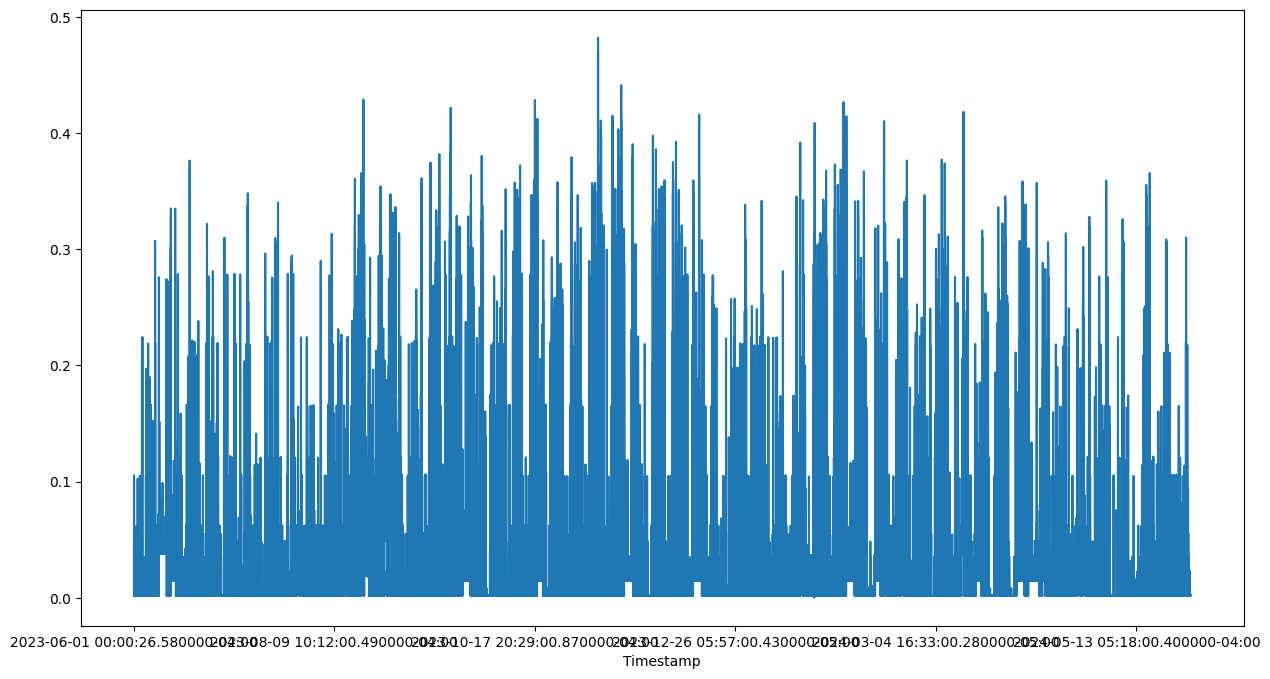

In [122]:
Load_2['Lighting_load (kW)'].plot(figsize=(15, 8))

In [123]:
name = "Lighting_load (kW)"
col_name = "Lighting"

outliers_z1 = find_outliers_Zscore(Load_2[name],13)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],13)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

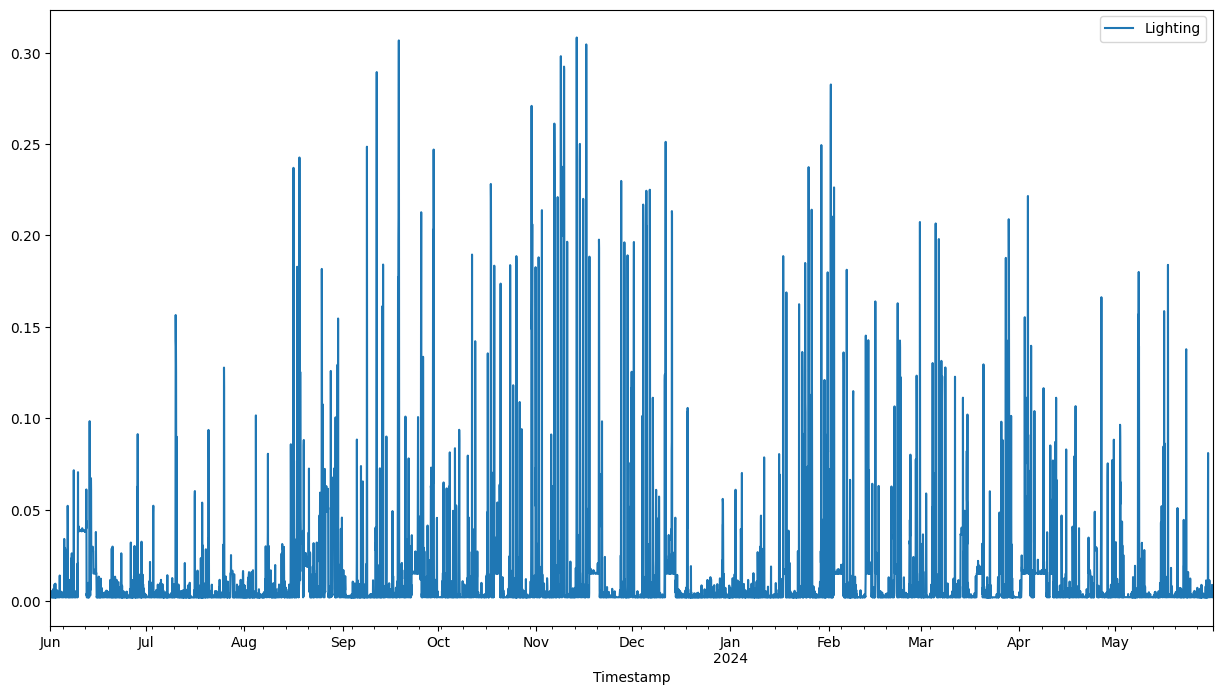

In [124]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [125]:
df_no_outliers

,Lighting
Timestamp,
2023-06-01 00:00:00-04:00,0.002067
2023-06-01 01:00:00-04:00,0.003791
2023-06-01 02:00:00-04:00,0.002063
2023-06-01 03:00:00-04:00,0.002066
2023-06-01 04:00:00-04:00,0.002069
...,...
2024-05-31 19:00:00-04:00,0.002050
2024-05-31 20:00:00-04:00,0.002036
2024-05-31 21:00:00-04:00,0.002009


In [126]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\Lighting_Year4.csv")

In [127]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[15]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Plug_third_floor_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.200000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.590000-04:00,0.001122,0,True
2023-06-01 00:01:00.570000-04:00,0.001076,0,True
2023-06-01 00:02:02.040000-04:00,0.001135,0,True
2023-06-01 00:03:00.570000-04:00,0.001105,0,True


In [128]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [129]:
name = "Plug3"

df_no_outliers = pd.DataFrame(Load_2["Plug_third_floor_load (kW)"].values, index=Load_2["Plug_third_floor_load (kW)"].index, columns=[name])

print(df_no_outliers)

                                     Plug3
Timestamp                                 
2023-06-01 00:00:26.590000-04:00  0.001122
2023-06-01 00:01:00.570000-04:00  0.001076
2023-06-01 00:02:02.040000-04:00  0.001135
2023-06-01 00:03:00.570000-04:00  0.001105
2023-06-01 00:04:00.560000-04:00  0.001142
...                                    ...
2024-05-31 23:55:00.420000-04:00  0.000970
2024-05-31 23:56:00.390000-04:00  0.000989
2024-05-31 23:57:00.410000-04:00  0.000984
2024-05-31 23:58:00.420000-04:00  0.000955
2024-05-31 23:59:00.400000-04:00  0.000952

[527033 rows x 1 columns]


C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

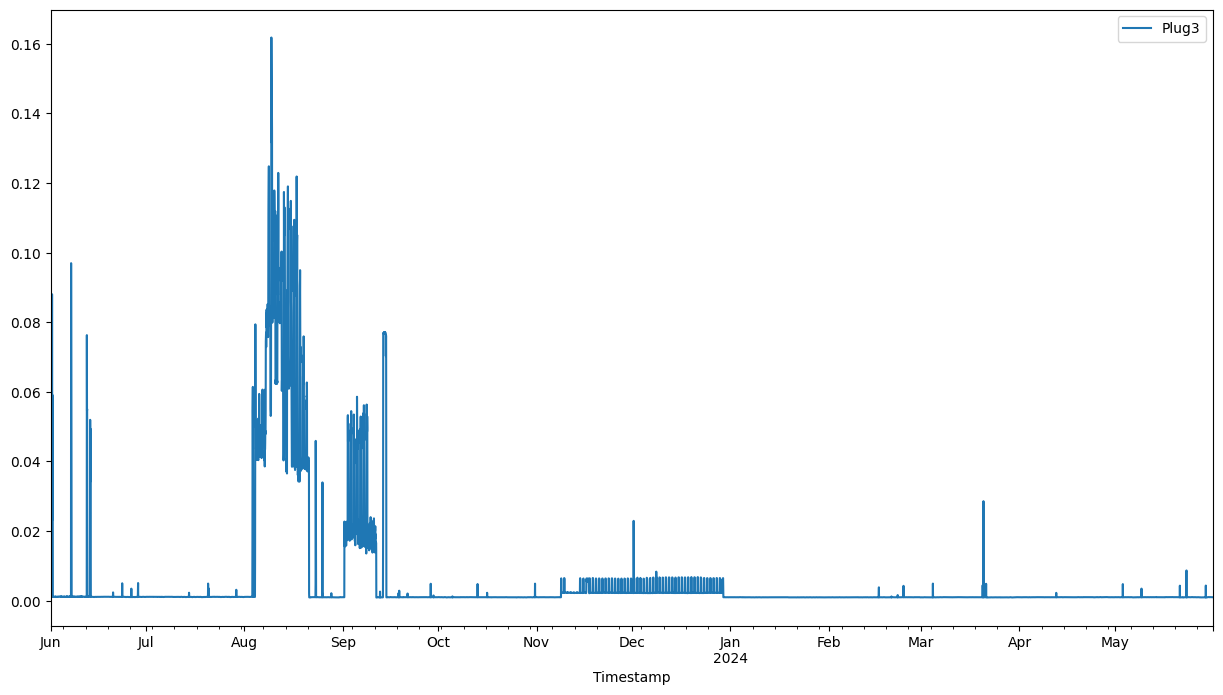

In [130]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [131]:
df_no_outliers

,Plug3
Timestamp,
2023-06-01 00:00:00-04:00,0.001106
2023-06-01 01:00:00-04:00,0.001105
2023-06-01 02:00:00-04:00,0.001111
2023-06-01 03:00:00-04:00,0.001111
2023-06-01 04:00:00-04:00,0.001105
...,...
2024-05-31 19:00:00-04:00,0.000998
2024-05-31 20:00:00-04:00,0.000977
2024-05-31 21:00:00-04:00,0.000966


In [132]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\Plug3_Year4.csv")

In [133]:
res

['HZ_Basement_plug_load_060123-053124_raw.csv',
 'HZ_Basement_SHNT_cabinet_load_060123-053124_raw.csv',
 'HZ_Cooling_pump_load_060123-053124_raw.csv',
 'HZ_Electric_hot_water_load_060123-053124_raw.csv',
 'HZ_Elevator_load_060123-053124_raw.csv',
 'HZ_Elevator_sumpump_load_060123-053124_raw.csv',
 'HZ_Emergency_light_load_060123-053124_raw.csv',
 'HZ_Exhaust_fan_load_060123-053124_raw.csv',
 'HZ_Fire_alarm_panel_load_060123-053124_raw.csv',
 'HZ_First_floor_plug_load_060123-053124_raw.csv',
 'HZ_Heat_pump_electric_load_060123-053124_raw.csv',
 'HZ_Heat_pump_load_060123-053124_raw.csv',
 'HZ_IT_load_060123-053124_raw.csv',
 'HZ_Lighting_load_060123-053124_raw.csv',
 'HZ_Main_load_060123-053124_raw.csv',
 'HZ_Plug_third_floor_load_060123-053124_raw.csv',
 'HZ_PV_meter1_load_060123-053124_raw.csv',
 'HZ_PV_meter2_load_060123-053124_raw.csv',
 'HZ_Second_floor_plug_load_060123-053124_raw.csv',
 'HZ_Solar_hot_water_load_060123-053124_raw.csv',
 'HZ_Solar_rapid_shutdown_load_060123-053124_ra

In [134]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[18]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Second_floor_plug_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.200000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.590000-04:00,0.011047,0,True
2023-06-01 00:01:00.570000-04:00,0.012508,0,True
2023-06-01 00:02:02.040000-04:00,0.012217,0,True
2023-06-01 00:03:00.560000-04:00,0.011683,0,True


In [135]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [136]:
name = "Plug2"

df_no_outliers = pd.DataFrame(Load_2["Second_floor_plug_load (kW)"].values, index=Load_2["Second_floor_plug_load (kW)"].index, columns=[name])

print(df_no_outliers)

                                     Plug2
Timestamp                                 
2023-06-01 00:00:26.590000-04:00  0.011047
2023-06-01 00:01:00.570000-04:00  0.012508
2023-06-01 00:02:02.040000-04:00  0.012217
2023-06-01 00:03:00.560000-04:00  0.011683
2023-06-01 00:04:00.560000-04:00  0.012424
...                                    ...
2024-05-31 23:55:00.420000-04:00  0.013150
2024-05-31 23:56:00.390000-04:00  0.015286
2024-05-31 23:57:00.410000-04:00  0.015336
2024-05-31 23:58:00.420000-04:00  0.015658
2024-05-31 23:59:00.400000-04:00  0.014999

[527033 rows x 1 columns]


C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

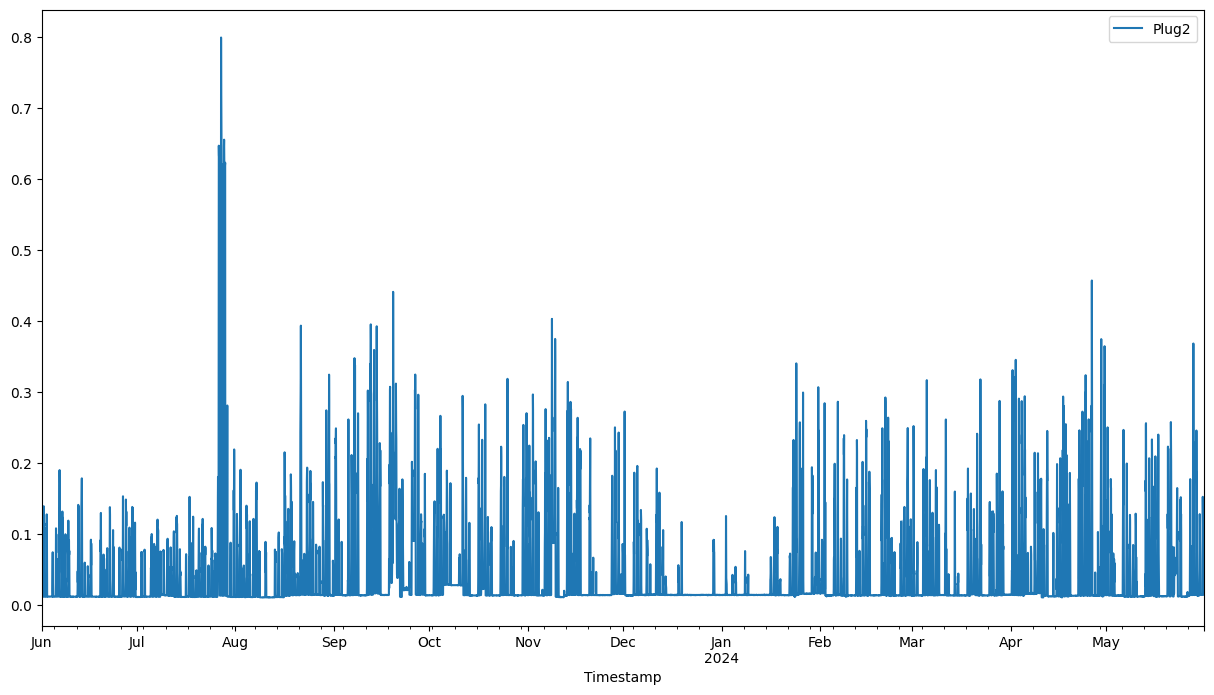

In [137]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [138]:
df_no_outliers

,Plug2
Timestamp,
2023-06-01 00:00:00-04:00,0.011967
2023-06-01 01:00:00-04:00,0.011919
2023-06-01 02:00:00-04:00,0.011964
2023-06-01 03:00:00-04:00,0.011840
2023-06-01 04:00:00-04:00,0.011925
...,...
2024-05-31 19:00:00-04:00,0.014645
2024-05-31 20:00:00-04:00,0.014449
2024-05-31 21:00:00-04:00,0.014573


In [140]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\Plug2_Year4.csv")

In [141]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[19]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Solar_hot_water_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.260000-04:00,-1.0,1099511627776,False
2023-06-01 00:00:26.620000-04:00,0.0,0,True
2023-06-01 00:01:00.590000-04:00,0.0,0,True
2023-06-01 00:02:02.080000-04:00,0.0,0,True
2023-06-01 00:03:00.590000-04:00,0.0,0,True


In [142]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [143]:
Load_2

,Solar_hot_water_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:26.620000-04:00,0.0,0,True
2023-06-01 00:01:00.590000-04:00,0.0,0,True
2023-06-01 00:02:02.080000-04:00,0.0,0,True
2023-06-01 00:03:00.590000-04:00,0.0,0,True
2023-06-01 00:04:00.590000-04:00,0.0,0,True
...,...,...,...
2024-05-31 23:55:00.440000-04:00,0.0,0,True
2024-05-31 23:56:00.420000-04:00,0.0,0,True
2024-05-31 23:57:00.440000-04:00,0.0,0,True


In [144]:
Load_2.describe()

,Solar_hot_water_load (kW),Quality
count,527028.000000,5.270280e+05
mean,0.003643,1.281791e+10
std,0.013104,1.899412e+12
min,-0.000152,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.000000,0.000000e+00
max,0.061739,2.814750e+14


In [145]:
Load_2['Solar_hot_water_load (kW)'] = Load_2['Solar_hot_water_load (kW)'].where((Load_2['Solar_hot_water_load (kW)'] < 1) & (Load_2['Solar_hot_water_load (kW)'] >= 0), np.nan)

In [146]:
Load_2['Solar_hot_water_load (kW)'].describe()

count    527018.000000
mean          0.003643
std           0.013104
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.061739
Name: Solar_hot_water_load (kW), dtype: float64

In [147]:
Load_2['Solar_hot_water_load (kW)']


Timestamp
2023-06-01 00:00:26.620000-04:00    0.0
2023-06-01 00:01:00.590000-04:00    0.0
2023-06-01 00:02:02.080000-04:00    0.0
2023-06-01 00:03:00.590000-04:00    0.0
2023-06-01 00:04:00.590000-04:00    0.0
                                   ... 
2024-05-31 23:55:00.440000-04:00    0.0
2024-05-31 23:56:00.420000-04:00    0.0
2024-05-31 23:57:00.440000-04:00    0.0
2024-05-31 23:58:00.450000-04:00    0.0
2024-05-31 23:59:00.430000-04:00    0.0
Name: Solar_hot_water_load (kW), Length: 527028, dtype: float64

<Axes: xlabel='Timestamp'>

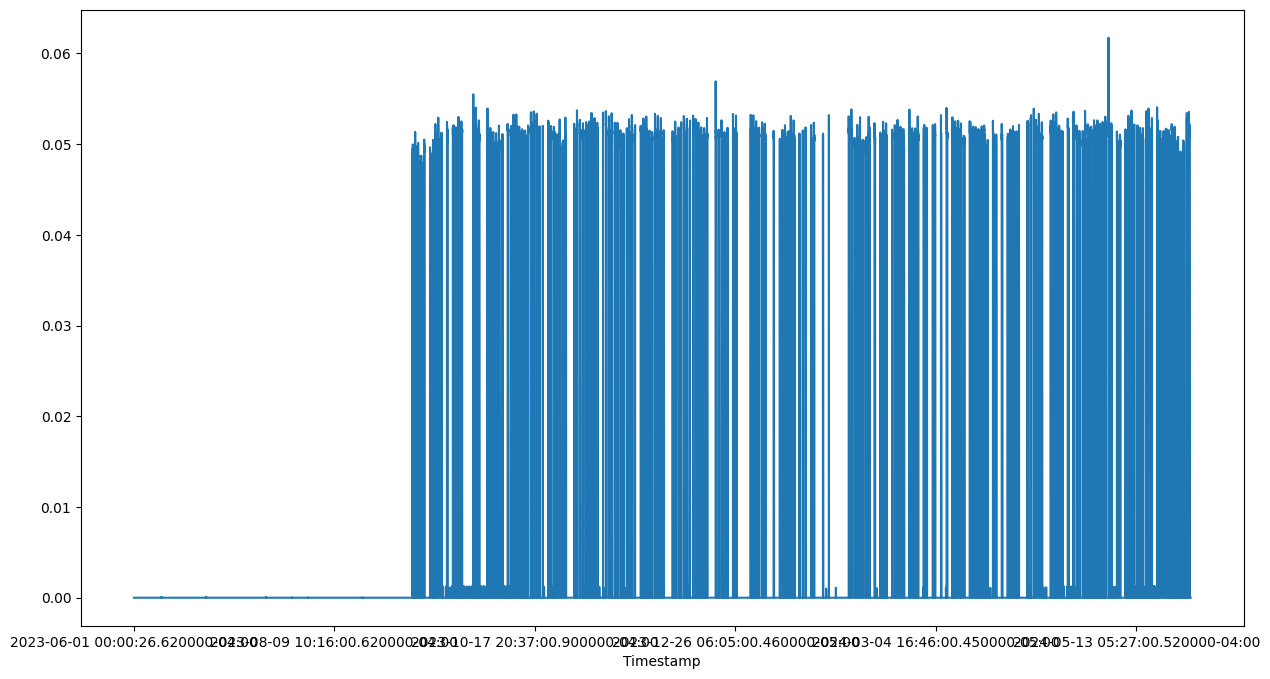

In [148]:
Load_2['Solar_hot_water_load (kW)'].plot(figsize=(15,8))

In [149]:
def find_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    outliers = df[(df<-k * z1_std + z1_mean) | (df>(k * z1_std + z1_mean))]

    return outliers

def remove_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    no_outliers = df[(df> (-k * z1_std + z1_mean)) & (df< (k * z1_std + z1_mean))]

    return no_outliers

In [150]:
name = "Solar_hot_water_load (kW)"
col_name = "SHW"

outliers_z1 = find_outliers_Zscore(Load_2[name],10)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],10)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =['Solar_hot_water_load (kW)'])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

In [151]:
df_no_outliers

,Solar_hot_water_load (kW)
Timestamp,
2023-06-01 00:00:26.620000-04:00,0.0
2023-06-01 00:01:00.590000-04:00,0.0
2023-06-01 00:02:02.080000-04:00,0.0
2023-06-01 00:03:00.590000-04:00,0.0
2023-06-01 00:04:00.590000-04:00,0.0
...,...
2024-05-31 23:55:00.440000-04:00,0.0
2024-05-31 23:56:00.420000-04:00,0.0
2024-05-31 23:57:00.440000-04:00,0.0


C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

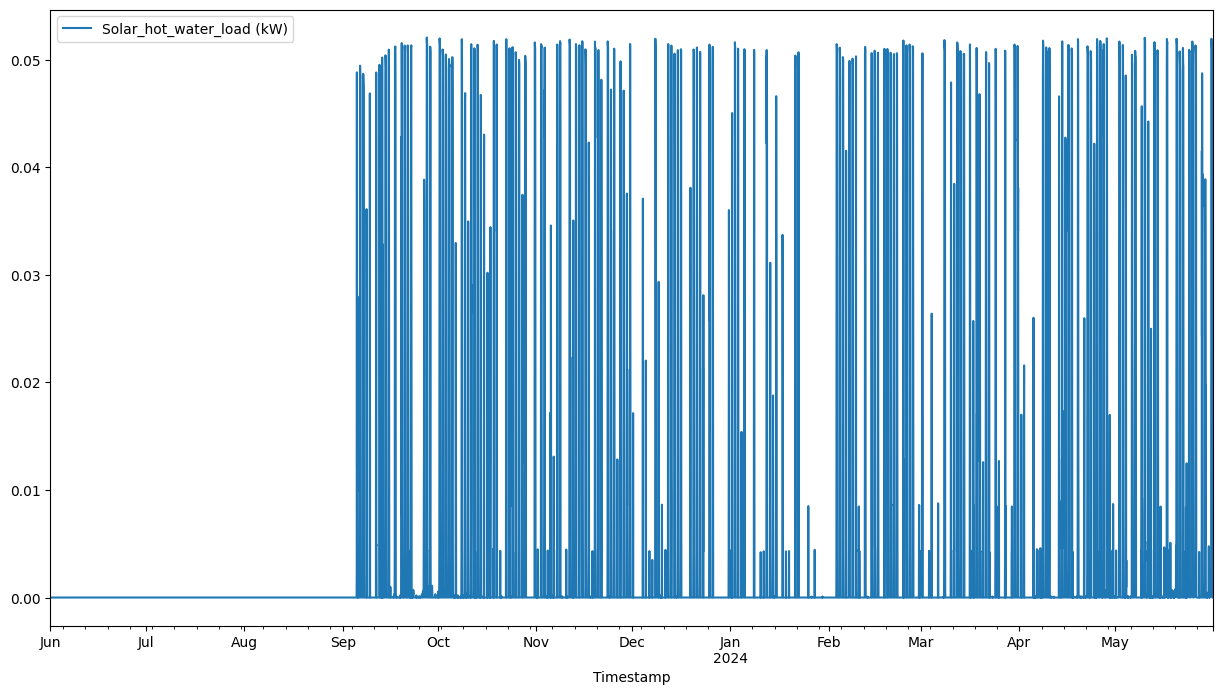

In [152]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [153]:
df_no_outliers

,Solar_hot_water_load (kW)
Timestamp,
2023-06-01 00:00:00-04:00,0.0
2023-06-01 01:00:00-04:00,0.0
2023-06-01 02:00:00-04:00,0.0
2023-06-01 03:00:00-04:00,0.0
2023-06-01 04:00:00-04:00,0.0
...,...
2024-05-31 19:00:00-04:00,0.0
2024-05-31 20:00:00-04:00,0.0
2024-05-31 21:00:00-04:00,0.0


In [154]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\SHW_Year4.csv")

In [155]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[20]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Solar_rapid_shutdown_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.260000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.630000-04:00,0.003977,0,True
2023-06-01 00:01:00.600000-04:00,0.003977,0,True
2023-06-01 00:02:02.080000-04:00,0.003977,0,True
2023-06-01 00:03:00.590000-04:00,0.003977,0,True


In [156]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [157]:
Load_2['Solar_rapid_shutdown_load (kW)'].describe()

count    527029.000000
mean          0.004063
std           0.000320
min           0.000000
25%           0.003927
50%           0.004052
75%           0.004219
max           0.004890
Name: Solar_rapid_shutdown_load (kW), dtype: float64

In [158]:
name = "Solar_rapid_shutdown_load (kW)"
col_name = "Solar rapid shutdown"

outliers_z1 = find_outliers_Zscore(Load_2[name],3)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],3)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

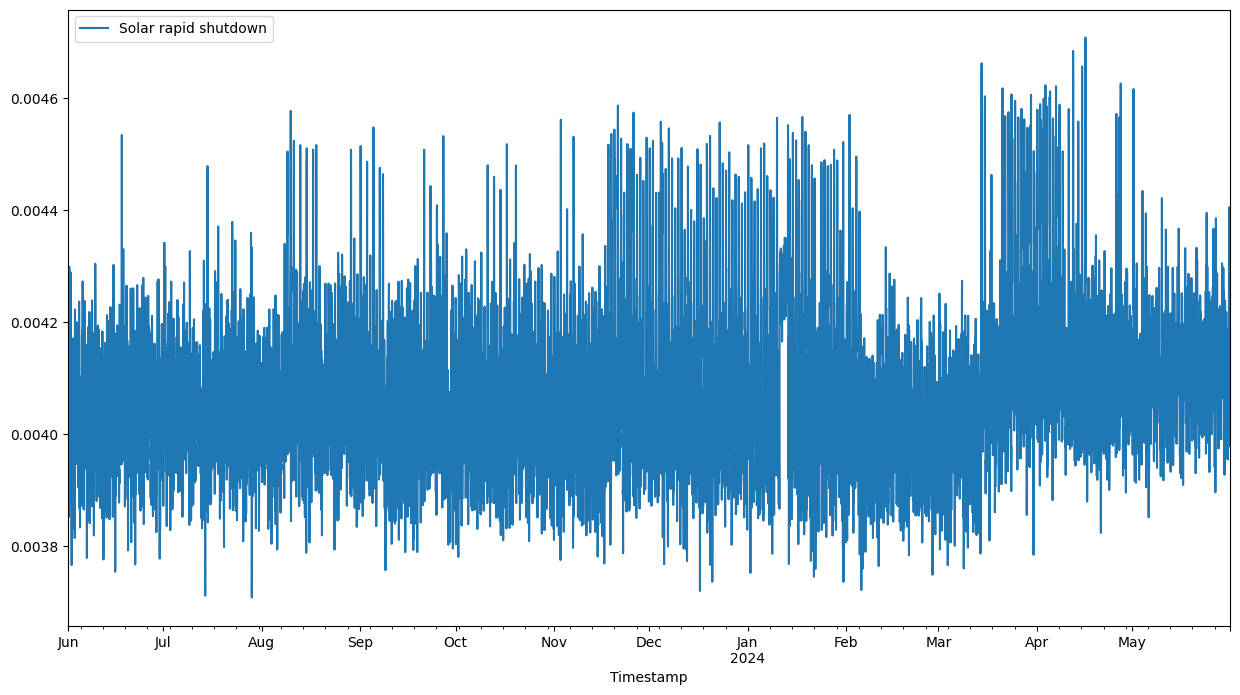

In [159]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [160]:
df_no_outliers.isna().sum()

Solar rapid shutdown    0
dtype: int64

In [161]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\SRSD_Year4.csv")

In [162]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[21]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,WindowMaster_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.290000-04:00,-1.000000,1099511627776,False
2023-06-01 00:00:26.650000-04:00,0.129384,0,True
2023-06-01 00:01:00.610000-04:00,0.129455,0,True
2023-06-01 00:02:02.100000-04:00,0.129496,0,True
2023-06-01 00:03:00.610000-04:00,0.129413,0,True


In [163]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [164]:
name = "WindowMaster_load (kW)"
col_name = "Control"

outliers_z1 = find_outliers_Zscore(Load_2[name],5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

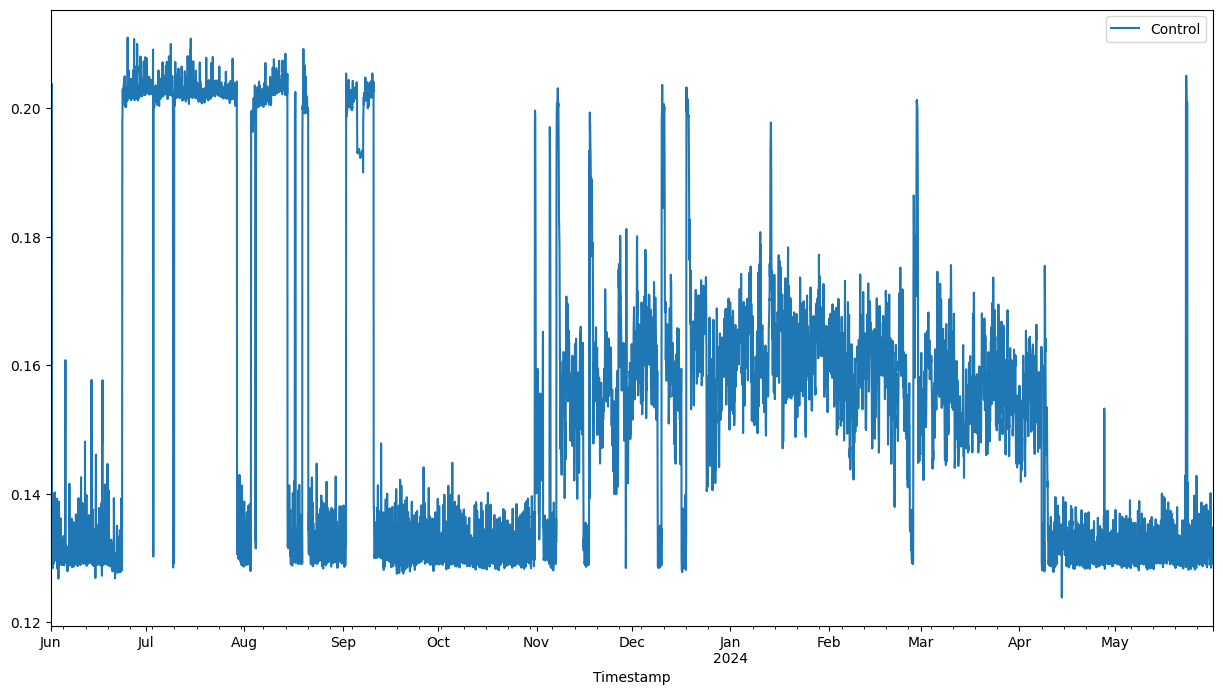

In [165]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [166]:
df_no_outliers

,Control
Timestamp,
2023-06-01 00:00:00-04:00,0.170596
2023-06-01 01:00:00-04:00,0.200758
2023-06-01 02:00:00-04:00,0.202078
2023-06-01 03:00:00-04:00,0.202259
2023-06-01 04:00:00-04:00,0.201630
...,...
2024-05-31 19:00:00-04:00,0.130965
2024-05-31 20:00:00-04:00,0.129175
2024-05-31 21:00:00-04:00,0.129869


In [167]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\WMLoad_Year4.csv")

In [168]:
res

['HZ_Basement_plug_load_060123-053124_raw.csv',
 'HZ_Basement_SHNT_cabinet_load_060123-053124_raw.csv',
 'HZ_Cooling_pump_load_060123-053124_raw.csv',
 'HZ_Electric_hot_water_load_060123-053124_raw.csv',
 'HZ_Elevator_load_060123-053124_raw.csv',
 'HZ_Elevator_sumpump_load_060123-053124_raw.csv',
 'HZ_Emergency_light_load_060123-053124_raw.csv',
 'HZ_Exhaust_fan_load_060123-053124_raw.csv',
 'HZ_Fire_alarm_panel_load_060123-053124_raw.csv',
 'HZ_First_floor_plug_load_060123-053124_raw.csv',
 'HZ_Heat_pump_electric_load_060123-053124_raw.csv',
 'HZ_Heat_pump_load_060123-053124_raw.csv',
 'HZ_IT_load_060123-053124_raw.csv',
 'HZ_Lighting_load_060123-053124_raw.csv',
 'HZ_Main_load_060123-053124_raw.csv',
 'HZ_Plug_third_floor_load_060123-053124_raw.csv',
 'HZ_PV_meter1_load_060123-053124_raw.csv',
 'HZ_PV_meter2_load_060123-053124_raw.csv',
 'HZ_Second_floor_plug_load_060123-053124_raw.csv',
 'HZ_Solar_hot_water_load_060123-053124_raw.csv',
 'HZ_Solar_rapid_shutdown_load_060123-053124_ra

In [169]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[11]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Heat_pump_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.150000-04:00,-1.0,1099511627776,False
2023-06-01 00:00:26.580000-04:00,0.0,0,True
2023-06-01 00:01:00.560000-04:00,0.0,0,True
2023-06-01 00:02:02.030000-04:00,0.0,0,True
2023-06-01 00:03:00.560000-04:00,0.0,0,True


In [170]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [171]:
name = "Heat_pump_load (kW)"
col_name = "Heating"

outliers_z1 = find_outliers_Zscore(Load_2[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

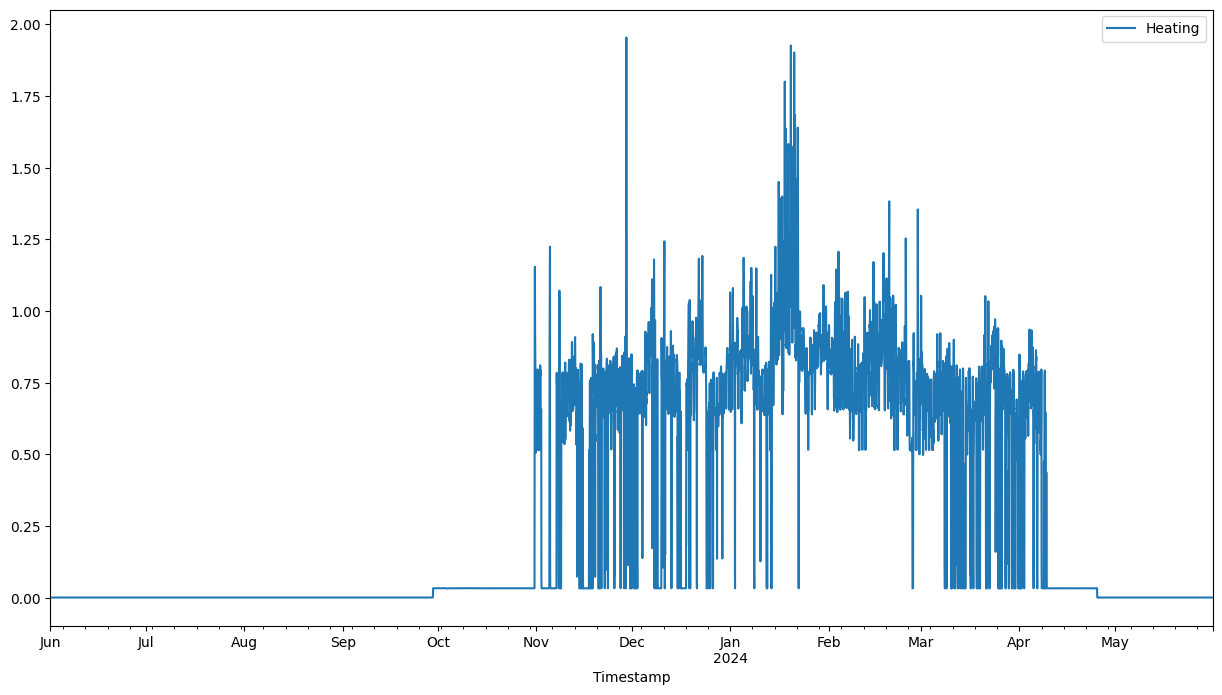

In [172]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [173]:
df_no_outliers

,Heating
Timestamp,
2023-06-01 00:00:00-04:00,0.0
2023-06-01 01:00:00-04:00,0.0
2023-06-01 02:00:00-04:00,0.0
2023-06-01 03:00:00-04:00,0.0
2023-06-01 04:00:00-04:00,0.0
...,...
2024-05-31 19:00:00-04:00,0.0
2024-05-31 20:00:00-04:00,0.0
2024-05-31 21:00:00-04:00,0.0


In [174]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\HeatPump_Year4.csv")

In [175]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[10]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Heat_pump_electric_load (kW),Quality,QualityGood
Timestamp,,,
2023-06-01 00:00:00.150000-04:00,-1.0,1099511627776,False
2023-06-01 00:00:26.570000-04:00,0.0,0,True
2023-06-01 00:01:00.560000-04:00,0.0,0,True
2023-06-01 00:02:02.020000-04:00,0.0,0,True
2023-06-01 00:03:00.560000-04:00,0.0,0,True


In [176]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [177]:
name = "Heat_pump_electric_load (kW)"
col_name = "Heat pump electric"

outliers_z1 = find_outliers_Zscore(Load_2[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_33932\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

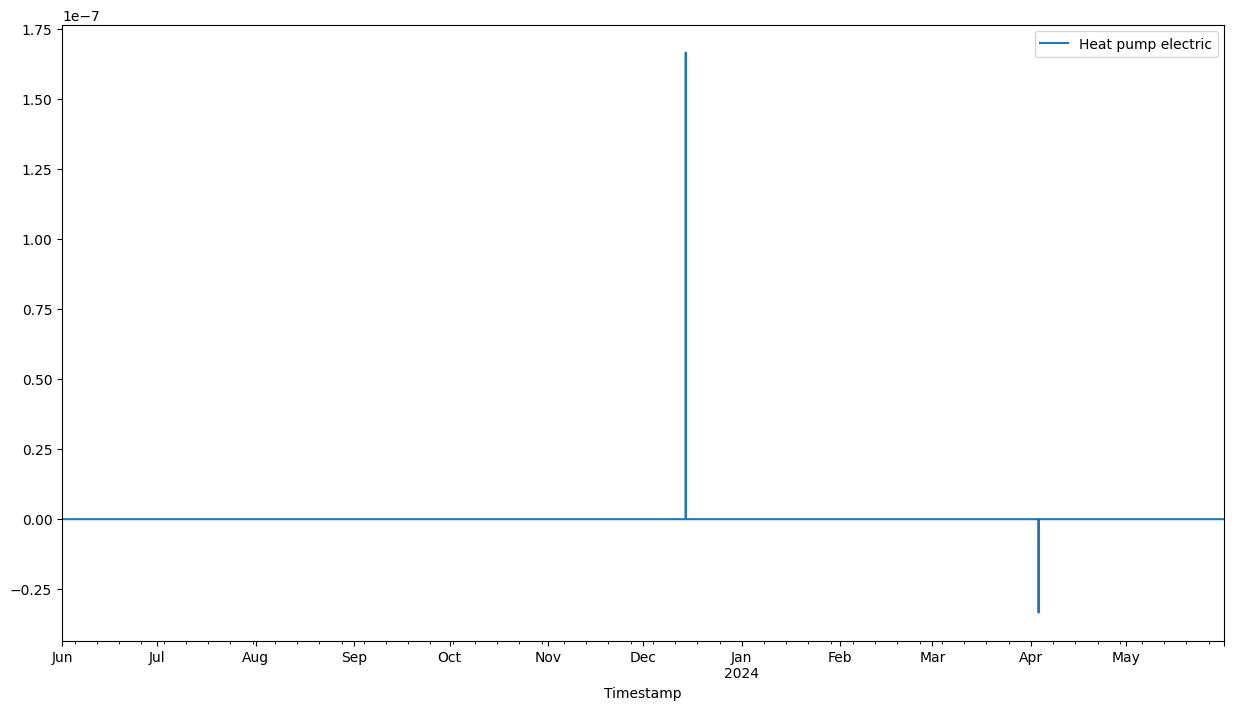

In [178]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [179]:
df_no_outliers = df_no_outliers.clip(lower=0)

In [180]:
df_no_outliers.describe()

,Heat pump electric
count,8.784000e+03
mean,1.897389e-11
std,1.778290e-09
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.666667e-07


In [181]:
df_no_outliers

,Heat pump electric
Timestamp,
2023-06-01 00:00:00-04:00,0.0
2023-06-01 01:00:00-04:00,0.0
2023-06-01 02:00:00-04:00,0.0
2023-06-01 03:00:00-04:00,0.0
2023-06-01 04:00:00-04:00,0.0
...,...
2024-05-31 19:00:00-04:00,0.0
2024-05-31 20:00:00-04:00,0.0
2024-05-31 21:00:00-04:00,0.0


In [182]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\HeatPumpElectric_Year4.csv")

In [183]:
#Sang Path
import os

# folder path
dir_path2 = r'C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads'

res2 = []

# Iterate directory
for path in os.listdir(dir_path2):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path2, path)):
        res2.append(path)
print(res2)

['BasementPlug_Year4.csv', 'Cooling_Year4.csv', 'EF_Year4.csv', 'EHW_Year4.csv', 'Elevator_sumppump_Year4.csv', 'ELL_Year4.csv', 'EL_Year4.csv', 'FA_Year4.csv', 'HeatPumpElectric_Year4.csv', 'HeatPump_Year4.csv', 'IT_Year4.csv', 'Lighting_Year4.csv', 'Plug1_Year4.csv', 'Plug2_Year4.csv', 'Plug3_Year4.csv', 'SHNT_cabinet_Year4.csv', 'SHW_Year4.csv', 'SRSD_Year4.csv', 'WMLoad_Year4.csv']


In [184]:
#Bring the files into dataframes
dfs = []

for file_name in [f for f in os.listdir(dir_path2) if f.endswith('.csv')]:
    file_path = os.path.join(dir_path2, file_name)
    df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col=['Timestamp'])
    dfs.append(df)

In [185]:
merged_df = pd.concat(dfs, axis=1)

print(merged_df.head())

                           Plug_Basement   Cooling  Exhaust fan      EHW  \
Timestamp                                                                  
2023-06-01 00:00:00-04:00       0.060557  0.079349     0.004065  0.00000   
2023-06-01 01:00:00-04:00       0.092682  0.190846     0.004040  0.00000   
2023-06-01 02:00:00-04:00       0.101246  0.190826     0.004022  0.00000   
2023-06-01 03:00:00-04:00       0.055301  0.190585     0.004046  0.00000   
2023-06-01 04:00:00-04:00       0.107533  0.190497     0.004023  0.16568   

                           Sumppump  Emergency light load        EL  \
Timestamp                                                             
2023-06-01 00:00:00-04:00  0.001167              0.048765  0.108641   
2023-06-01 01:00:00-04:00  0.001164              0.048407  0.108183   
2023-06-01 02:00:00-04:00  0.001160              0.048290  0.108065   
2023-06-01 03:00:00-04:00  0.001174              0.048419  0.108362   
2023-06-01 04:00:00-04:00  0.001167      

In [186]:
merged_df.head()

,Plug_Basement,Cooling,Exhaust fan,EHW,Sumppump,Emergency light load,EL,Fire alarm,Heat pump electric,Heating,IT,Lighting,Plug1,Plug2,Plug3,Battery cabinet,Solar_hot_water_load (kW),Solar rapid shutdown,Control
Timestamp,,,,,,,,,,,,,,,,,,,
2023-06-01 00:00:00-04:00,0.060557,0.079349,0.004065,0.00000,0.001167,0.048765,0.108641,0.066298,0.0,0.0,0.640311,0.002067,0.011848,0.011967,0.001106,0.003108,0.0,0.003981,0.170596
2023-06-01 01:00:00-04:00,0.092682,0.190846,0.004040,0.00000,0.001164,0.048407,0.108183,0.066528,0.0,0.0,0.654028,0.003791,0.011866,0.011919,0.001105,0.003135,0.0,0.003870,0.200758
2023-06-01 02:00:00-04:00,0.101246,0.190826,0.004022,0.00000,0.001160,0.048290,0.108065,0.066141,0.0,0.0,0.641614,0.002063,0.011925,0.011964,0.001111,0.003102,0.0,0.003881,0.202078
2023-06-01 03:00:00-04:00,0.055301,0.190585,0.004046,0.00000,0.001174,0.048419,0.108362,0.065712,0.0,0.0,0.639907,0.002066,0.011769,0.011840,0.001111,0.003107,0.0,0.003935,0.202259
2023-06-01 04:00:00-04:00,0.107533,0.190497,0.004023,0.16568,0.001167,0.048289,0.108168,0.066343,0.0,0.0,0.639982,0.002069,0.011947,0.011925,0.001105,0.003119,0.0,0.003871,0.201630


In [187]:
merged_df.isna().sum()

Plug_Basement                0
Cooling                      0
Exhaust fan                  0
EHW                          0
Sumppump                     0
Emergency light load         0
EL                           0
Fire alarm                   0
Heat pump electric           0
Heating                      0
IT                           0
Lighting                     0
Plug1                        0
Plug2                        0
Plug3                        0
Battery cabinet              0
Solar_hot_water_load (kW)    0
Solar rapid shutdown         0
Control                      0
dtype: int64

In [188]:
merged_df.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year4\Loads\Loads_Merged_Year4.csv")